# BANK LOAN CREDIT EDA 

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the csv file
# lets limit the number of rows and columns to be displayed to 400

df1 = pd.read_csv('application_data.csv')

pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

FileNotFoundError: [Errno 2] No such file or directory: 'application_data.csv'

In [1025]:
# display the overall information of the dataframe and lets get an elaborate one at that
# the 75% of all data is 367142 or less
# the 25% of all data is 189145.5 or less
# the median 50% of all the data is 278202 or less
# the mean is 278180.518577

df1.info(verbose = True)
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [1026]:
# categorizing the columns of the dataframe to numerical and categorical columns
# as seen there are 106 numerical columns and 16 categorical columns

numerical_columns = df1.select_dtypes(include=(['int64', 'float']))
categorical_columns = df1.select_dtypes(include = ['object'])

print(len(numerical_columns.columns), ',', len(categorical_columns.columns))

106 , 16


In [1027]:
# There are 307511 total records

print(numerical_columns.shape, categorical_columns.shape)

(307511, 106) (307511, 16)


In [1028]:
# the columns is gotten in a list

numerical_columns.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [1029]:
# lets get the categorical columns as well in a list

categorical_columns.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [1030]:
# lets get only the columns from the df1 dataframe which contain null values

df1.columns[df1.isna().sum() > 0]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [1031]:
# the total number of null values in the dataframe df1 is 67

len(df1.columns[df1.isna().sum() > 0])

67

In [1032]:
# checking there are proper datatypes assigned or not to the columns
print(df1.dtypes)

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [1033]:
# getting the perccentage of null values in all the columns

(df1.isna().sum()/len(df1))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [1034]:
# getting rid of all the columns consisting of null values greater than 40%

df1.drop(df1.loc[:, ((((df1.isna().sum()/len(df1))*100))>=40)], axis = 1, inplace = True)

# 

In [1035]:
# the remaining columns still have null values but are reduced in number
df1.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [1036]:
# there are 73 columns after columns removal

df1.shape

(307511, 73)

In [1037]:
# the total number of columns with null values is 18

len(df1.columns[df1.isna().sum() > 0])

18

In [1038]:
# display the overall information of the dataframe and lets get an elaborate one at that
# the 75% of all data is 367142 or less
# the 25% of all data is 189145.5 or less
# the median 50% of all the data is 278202 or less
# the mean is 278180.518577

df1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [1039]:
# get the first 5 records

df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [1040]:
# get the information of the dataframe

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [1041]:
# Checking the datatypes again to be sure

df1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [1042]:
# again checking the numerical and categorical columns 

numerical_columns = df1.select_dtypes(include=(['int64', 'float64']))
categorical_columns= df1.select_dtypes(include = ['object'])

In [1043]:
numerical_columns

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351000.0                    0.018801       -9461   
1           35698.5        1129500.0                    0.003541      -16765   
2            6750.0         135000.0                    0.010032      -19046   
3           29686.5         297000.0                    0.008019      -19005   
4           21865.5         513000.0                    0.028663      -19932   
...             ...              ...                         ...         ...   
307506      27558.0         225000.0                    0.032561       -9327   
307507      12001.5         225000.0                    0.025164      -20775   
307508      29979.0         585000.0                    0.005002      -14966   
307509      20205.0         319500.0                    0.005313      -11961   
307510      49117.5         675000.0                    0.046220      -16856   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0                -637            -3648.0            -2120           1   
1               -1188            -1186.0             -291           1   
2                -225            -4260.0            -2531           1   
3               -3039            -9833.0            -2437           1   
4               -3038            -4311.0            -3458           1   
...               ...                ...              ...         ...   
307506           -236            -8456.0            -1982           1   
307507         365243            -4388.0            -4090           1   
307508          -7921            -6737.0            -5150           1   
307509          -4786            -2562.0             -931           1   
307510          -1262            -5128.0             -410           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0                    1                0                 1           1   
1                    1                0                 1           1   
2                    1                1                 1           1   
3                    1                0                 1           0   
4                    1                0                 1           0   
...                ...              ...               ...         ...   
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                0              1.0                     2   
1                0              2.0                     1   
2                0              1.0                     2   
3                0              2.0                     2   
4                0              1.0                     2   
...            ...              ...   

In [1044]:
# there are 61 numerical columns and 12 categorical columns

In [1045]:
len(numerical_columns.columns), len(categorical_columns.columns)


(61, 12)

In [1046]:
# getting rid of unnecessary columns which is 19 in number

(df1[['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']]).shape

(307511, 19)

In [1047]:
# deleting these columns from the dataframe

df1.drop(['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE'], axis = 1, inplace = True)

In [1048]:
# the number of columns reduced to 54

df1.shape

(307511, 54)

In [1049]:
# The number of columns having null values is 12

len(df1.columns[df1.isna().sum() > 0])

12

In [1050]:
# The columns having null values

df1[df1.columns[df1.isna().sum() > 0]].columns

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [1051]:
# the percentage of null columns from the entire df1 and sorting such columns according to the number null values 

100*(df1.isna().sum()/len(df1)).sort_values(ascending = False)[:13]

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
FLAG_DOCUMENT_17               0.000000
dtype: float64

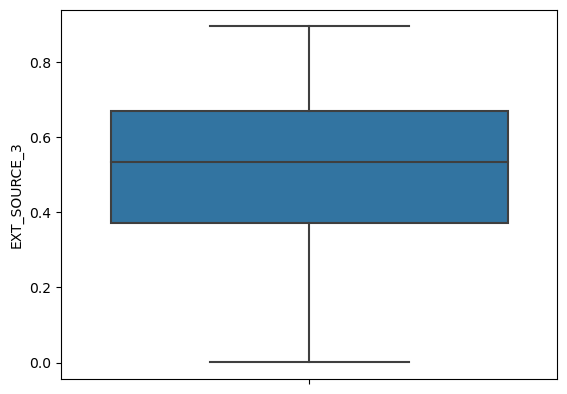

In [1052]:
# creating  a boxplot for one of the columns containing null values lets take EXT_SOURCE_3

sns.boxplot(data = df1, y = 'EXT_SOURCE_3' );

In [1053]:
df1['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [1054]:
# looking at the details the mean is at 0.51 and median is at 0.53
# the 25th and the 75th quartile is at 0.37, and 0.66
# looks like there are no outliers

In [1055]:
# now replacing the null values in the column with the mean 

df1['EXT_SOURCE_3'].replace(np.NaN, df1['EXT_SOURCE_3'].mean(), inplace = True)
df1['EXT_SOURCE_3'].isna().sum()

0

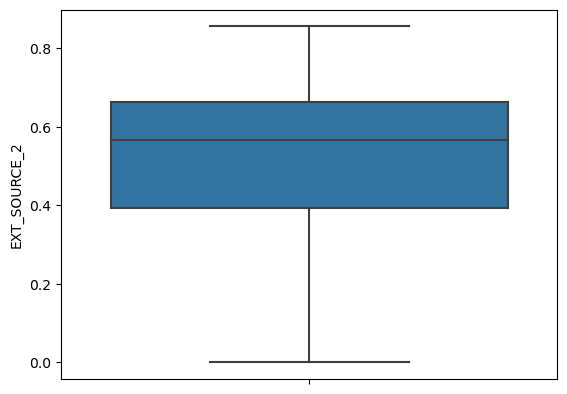

In [1056]:
# taking other column EXT_SOURCE_2 and creating a boxplot

sns.boxplot(data = df1, y = 'EXT_SOURCE_2' );

In [1057]:
# looking at the details the mean is at 0.51 and median is at 0.56
# the 25th and the 75th quartile is at 0.39, and 0.66
# looks like there are no outliers

df1['EXT_SOURCE_2'].describe().round(6)

count    306851.000000
mean          0.514393
std           0.191060
min           0.000000
25%           0.392457
50%           0.565961
75%           0.663617
max           0.855000
Name: EXT_SOURCE_2, dtype: float64

In [1058]:
# replacing the null values in the column by the mean of the column

df1['EXT_SOURCE_2'].replace(np.NaN, df1['EXT_SOURCE_2'].mean(), inplace = True)

In [1059]:
# checking the number of missing values in the column

df1['EXT_SOURCE_2'].isna().sum()

0

In [1060]:
# the number of columns with null values reduces to 10

len(df1.columns[df1.isna().sum()>0])

10

In [1061]:
# having a look at the remaining columns with null values and the % of missing values in df1

100*(df1.isna().sum()/len(df1)).sort_values(ascending = False)[:11]

OCCUPATION_TYPE               31.345545
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
FLAG_DOCUMENT_5                0.000000
dtype: float64

In [1062]:
# Looking at the other column AMT_GOODS_PRICE with null values AMT_GOODS_PRICE

df1['AMT_GOODS_PRICE'].describe().round()

count     307233.0
mean      538396.0
std       369446.0
min        40500.0
25%       238500.0
50%       450000.0
75%       679500.0
max      4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [1063]:
# looking at the details the mean is at 538396.0 and median is at 450000.0
# the 25th and the 75th quartile is at 238500, and 679500.0
# the standard deviation is high 
# looks like there are significant number of outliers which must be dealt with
# replacing them with the mean/median is going to result biasness so we remove rows,  which infact constitutes less than 0.1% of the total rows

sns.boxplot(data = df1, y = df1['AMT_GOODS_PRICE']);

In [1064]:
# so getting rid of such records

df1 = df1[~(df1.AMT_GOODS_PRICE.isna())]
df1

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
0           24700.5         351000.0               Working   
1           35698.5        1129500.0         State servant   
2            6750.0         135000.0               Working   
3           29686.5         297000.0               Working   
4           21865.5         513000.0               Working   
...             ...              ...                   ...   
307506      27558.0         225000.0               Working   
307507      12001.5         225000.0             Pensioner   
307508      29979.0         585000.0               Working   
307509      20205.0         319500.0  Commercial associate   
307510      49117.5         675000.0  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment                    0.025164      -20775   
307508  House / apartment                    0.005002      -14966   
307509  House / apartment                    0.005313      -11961   
307510  House / a

In [1065]:
# Taking another column AMT_REQ_CREDIT_BUREAU_QRT containing null values 

np.max(df1['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts())


215219

In [1066]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum()

41473

In [1067]:
df1['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

# looking at this, 0.0 is used the highest, 256692 times out of 307511 records
# the column is the Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
# so lets replace all the null values with this number 0.0 

0.0      215219
1.0       33841
2.0       14400
3.0        1716
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [1068]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.replace(np.NaN, df1['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace = True)

In [1069]:
100*(df1.isna().sum()/len(df1)).sort_values(ascending = False)

OCCUPATION_TYPE                31.355356
AMT_REQ_CREDIT_BUREAU_YEAR     13.498875
AMT_REQ_CREDIT_BUREAU_MON      13.498875
AMT_REQ_CREDIT_BUREAU_WEEK     13.498875
AMT_REQ_CREDIT_BUREAU_DAY      13.498875
AMT_REQ_CREDIT_BUREAU_HOUR     13.498875
AMT_ANNUITY                     0.003906
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_20

In [1070]:
# checking for any null values remaining in the column

df1.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum()

0

In [1071]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts())

# the counts of 0.0 also increases to 256692 due to replacing the nulls with 0.0

256692

In [1072]:
# Now the number of columns with null values is reduce to 7

len(df1.columns[df1.isna().sum() > 0])

7

In [1073]:
# taking another column AMT_REQ_CREDIT_BUREAU_MON

In [1074]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts())

222022

In [1075]:
df1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222022
1.0      33128
2.0       5385
3.0       1991
4.0       1076
5.0        602
6.0        342
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [1076]:
# this column also has 0.0 as the highest utilized value with over 222000 number of times utilized
# the column is Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
# so replacing the null values with the mode as before since it is a good decision than to replace with mean/median which will only conclude in biasness


In [1077]:
df1.AMT_REQ_CREDIT_BUREAU_MON.replace(np.NaN, df1['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace = True)

In [1078]:
# checking for the null values after replacement

df1.AMT_REQ_CREDIT_BUREAU_MON.isna().sum()

0

In [1079]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts())

# The 0.0 value gets increased to more than 263000 after replacement

263495

In [1080]:
# the number of columns left with null values is reduced to 6

len(df1.columns[df1.isna().sum() > 0])

6

In [1081]:
# taking another column AMT_REQ_CREDIT_BUREAU_YEAR with null values 

In [1082]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts())

71733

In [1083]:
df1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71733
1.0     63338
2.0     50143
3.0     33606
4.0     20702
5.0     12048
6.0      6961
7.0      3866
8.0      2126
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [1084]:
# this column also has 0.0 as the highest utilized value with over 71700 number of times utilized
# the column is Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)
# so replacing the null values with the mode as before since it is a good decision than to replace with mean/median which will only conclude in biasness


In [1085]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.replace(np.NaN, df1['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace = True)

In [1086]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.isna().sum()

0

In [1087]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts())

# The count of the 0.0 value increased to 113206 after replacement

113206

In [1088]:
# The number of columns with nulls reduced to 6

len(df1.columns[df1.isna().sum() > 0])

5

In [1089]:
# Taking another column containing null AMT_REQ_CREDIT_BUREAU_WEEK

In [1090]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts())

257228

In [1091]:
df1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257228
1.0      8204
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [1092]:
# this column also has 0.0 as the highest utilized value with over 257000 number of times utilized
# the column is Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
# so replacing the null values with the mode as before since it is a good decision than to replace with mean/median which will only conclude in biasness


In [1093]:
df1.AMT_REQ_CREDIT_BUREAU_WEEK.replace(np.NaN, df1['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace = True)

In [1094]:
df1.AMT_REQ_CREDIT_BUREAU_WEEK.isna().sum()

0

In [1095]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts())

# the count of 0.0 changes from 257228 to 298701 after replacement

298701

In [1096]:
# The number of columns containing null values is 4

len(df1.columns[df1.isna().sum() > 0])

4

In [1097]:
# Taking another column AMT_REQ_CREDIT_BUREAU_DAY with null value 

In [1098]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts())


264271

In [1099]:
df1['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264271
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [1100]:
# this column also has 0.0 as the highest utilized value with over 264000 number of times utilized
# the column is Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
# so replacing the null values with the mode as before since it is a good decision than to replace with mean/median which will only conclude in biasness


In [1101]:
df1.AMT_REQ_CREDIT_BUREAU_DAY.replace(np.NaN, df1['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace = True)

In [1102]:
df1.AMT_REQ_CREDIT_BUREAU_DAY.isna().sum()

0

In [1103]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts())

# the number of counts of 0.0 changes to 305744 after replacement

305744

In [1104]:
# the number of columns with null values reduces to 3

len(df1.columns[df1.isna().sum() > 0])

3

In [1105]:
# taking another column with null values AMT_REQ_CREDIT_BUREAU_HOUR

In [1106]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts())


264135

In [1107]:
df1['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264135
1.0      1559
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [1108]:
# this column also has 0.0 as the highest utilized value with over 264000 number of times utilized
# the column is Number of enquiries to Credit Bureau about the client one hour before application
# so replacing the null values with the mode as before since it is a good decision than to replace with mean/median which will only conclude in biasness

In [1109]:
df1.AMT_REQ_CREDIT_BUREAU_HOUR.replace(np.NaN, df1['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace = True)

In [1110]:
df1.AMT_REQ_CREDIT_BUREAU_HOUR.isna().sum()

0

In [1111]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts())

# the count of 0.0 changes to 305608 after replacement

305608

In [1112]:
# the number of columns with null values reduces to 2

len(df1.columns[df1.isna().sum() > 0])

2

In [1113]:
df1.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96334
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                       0
E

In [1114]:
# Now taking AMT_ANNUITY column

In [1115]:
df1.AMT_ANNUITY.describe()

# the mean is 27120.452357 and median is 24916.5
# 25th and 75th percentile is 16551 and 34596



count    307221.000000
mean      27120.452357
std       14492.106811
min        1615.500000
25%       16551.000000
50%       24916.500000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [1116]:
df1.AMT_ANNUITY.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    24916.5
0.70    32017.5
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

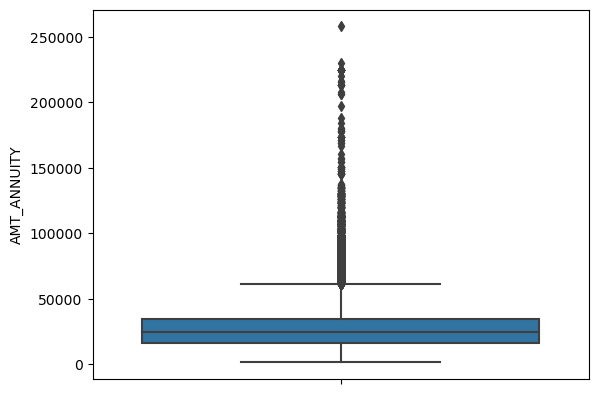

In [1117]:
sns.boxplot(data = df1, y = df1.AMT_ANNUITY);

In [1118]:
# looking at the summary and the boxplot it looks like there is no outliers in the column

In [1119]:
# lets replace the null values with the mean

df1.AMT_ANNUITY.replace(np.NaN, df1.AMT_ANNUITY.mean(), inplace = True)

In [1120]:
df1.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96334
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                       0
E

In [1121]:
# looking at the OCCUPATION_TYPE column

print(df1.OCCUPATION_TYPE.value_counts()[0])

print(df1.OCCUPATION_TYPE.isna().sum())

# here the Laborers value count is 55134
# the count of all the null values in the column is 96334 > 55134
# so it is best not to fill the null values with 55134 because it will increase the count of laborers column


55134
96334


In [1122]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  \
0       -9461           -637            -2120        Laborers   
1      -16765          -1188             -291      Core staff   
2      -19046           -225            -2531        Laborers   
3      -19005          -3039            -2437        Laborers   
4      -19932          -3038            -3458      Core staff   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_2  \
0  Business Entity Type 3      0.262949      0.139376                0   
1                  School      0.622246      0.510853                0   
2              Government      0.555912      0.729567                0   
3  Business Entity Type 3      0.650442      0.510853                0   
4                Religion      0.322738      0.510853                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
3                1                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0      

In [1123]:
df1[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH
0            -9461           -637            -2120
1           -16765          -1188             -291
2           -19046           -225            -2531
3           -19005          -3039            -2437
4           -19932          -3038            -3458
...            ...            ...              ...
307506       -9327           -236            -1982
307507      -20775         365243            -4090
307508      -14966          -7921            -5150
307509      -11961          -4786             -931
307510      -16856          -1262             -410

[307233 rows x 3 columns]

In [1124]:
# Now we need to change the sign of the values in the three columns 'DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH'
# since the values cant be negative in these columns

In [1125]:
def func(x):
    if x<0:        
        return x*(-1)
    else:
        return x

In [1126]:
df1[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']] = df1[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']].applymap(func)

In [1127]:
df1[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH
0             9461            637             2120
1            16765           1188              291
2            19046            225             2531
3            19005           3039             2437
4            19932           3038             3458
...            ...            ...              ...
307506        9327            236             1982
307507       20775         365243             4090
307508       14966           7921             5150
307509       11961           4786              931
307510       16856           1262              410

[307233 rows x 3 columns]

In [1128]:
# converting the DAYS_BIRTH column which consists of client's age in days at the time of application into age

df1['Age'] = df1.DAYS_BIRTH.apply(lambda x: int(np.round(x/365)))
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307233 non-null  int64  
 1   TARGET                       307233 non-null  int64  
 2   NAME_CONTRACT_TYPE           307233 non-null  object 
 3   CODE_GENDER                  307233 non-null  object 
 4   FLAG_OWN_CAR                 307233 non-null  object 
 5   FLAG_OWN_REALTY              307233 non-null  object 
 6   CNT_CHILDREN                 307233 non-null  int64  
 7   AMT_INCOME_TOTAL             307233 non-null  float64
 8   AMT_CREDIT                   307233 non-null  float64
 9   AMT_ANNUITY                  307233 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307233 non-null  object 
 12  NAME_EDUCATION_TYPE          307233 non-null  object 
 13 

# DATA VISUALIZATION

In [1129]:
# Dealing with outliers

In [1130]:
# Boxplot of AMT_INCOME_TOTAL

sns.boxplot(data = df1, y = 'AMT_INCOME_TOTAL');

# Outlier is present far removed from the body

In [1131]:
df1.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    148500.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [1132]:
df1.AMT_INCOME_TOTAL.describe().round()

count       307233.0
mean        168833.0
std         237216.0
min          25650.0
25%         112500.0
50%         148500.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [1133]:
# inter quartile range
int_quart_range = df1.AMT_INCOME_TOTAL.quantile([0.25, 0.75]).values[1] - df1.AMT_INCOME_TOTAL.quantile([0.25, 0.75]).values[0]

In [1134]:
# upper bounf
ub = 1.5*int_quart_range + df1.AMT_INCOME_TOTAL.quantile([0.25, 0.75]).values[1]


In [1135]:
# replacing the values greater than upper boud ub by the ub

df1['AMT_INCOME_TOTAL'] = df1['AMT_INCOME_TOTAL'].clip(upper=ub)
df1['AMT_INCOME_TOTAL'].head(25)

0     202500.000
1     270000.000
2      67500.000
3     135000.000
4     121500.000
5      99000.000
6     171000.000
7     337500.000
8     112500.000
9     135000.000
10    112500.000
11     38419.155
12     67500.000
13    225000.000
14    189000.000
15    157500.000
16    108000.000
17     81000.000
18    112500.000
19     90000.000
20    135000.000
21    202500.000
22    337500.000
23     83250.000
24    135000.000
Name: AMT_INCOME_TOTAL, dtype: float64

In [1136]:
sns.boxplot(data = df1, y = df1.AMT_INCOME_TOTAL);

In [1137]:
# AMT_GOODS_PRICE

In [1138]:
df1.AMT_GOODS_PRICE.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     450000.0
0.70     675000.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [1139]:
df1.AMT_GOODS_PRICE.describe().round(3)

count     307233.000
mean      538396.207
std       369446.461
min        40500.000
25%       238500.000
50%       450000.000
75%       679500.000
max      4050000.000
Name: AMT_GOODS_PRICE, dtype: float64

In [1140]:
sns.boxplot(data = df1, x = df1.AMT_GOODS_PRICE);

# there are several outliers far removed from the continuous datapoints

In [1141]:
# interquartile range
int_quart_range = df1.AMT_GOODS_PRICE.quantile([0.25, 0.75]).values[1] - df1.AMT_GOODS_PRICE.quantile([0.25, 0.75]).values[0]

In [1142]:
# calculating the upper bound
ub = 1.5*int_quart_range + df1.AMT_GOODS_PRICE.quantile([0.25, 0.75]).values[1]

In [1143]:
# replacing the values where the values are greater than upper bound

df1['AMT_GOODS_PRICE'] = df1['AMT_GOODS_PRICE'].clip(upper=ub)
df1['AMT_GOODS_PRICE']

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307233, dtype: float64

In [1144]:
sns.boxplot(data = df1, y = df1.AMT_GOODS_PRICE);

In [1145]:
# AMT_ANNUITY

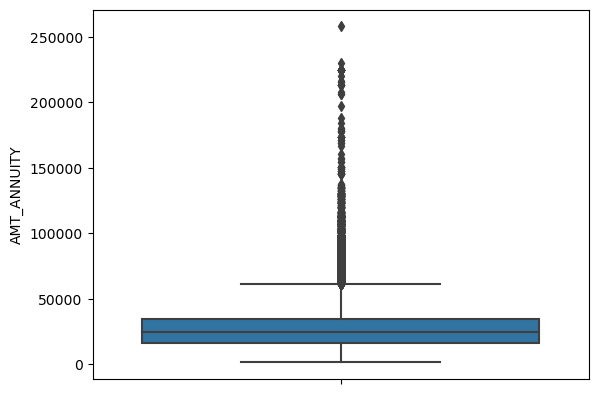

In [1146]:
sns.boxplot(data = df1, y = df1.AMT_ANNUITY);

In [1147]:
df1.AMT_ANNUITY.describe().round(2)

# No outliers present
# difference in min and max is normal

count    307233.00
mean      27120.45
std       14491.82
min        1615.50
25%       16551.00
50%       24925.50
75%       34596.00
max      258025.50
Name: AMT_ANNUITY, dtype: float64

In [1148]:
# AMT_CREDIT

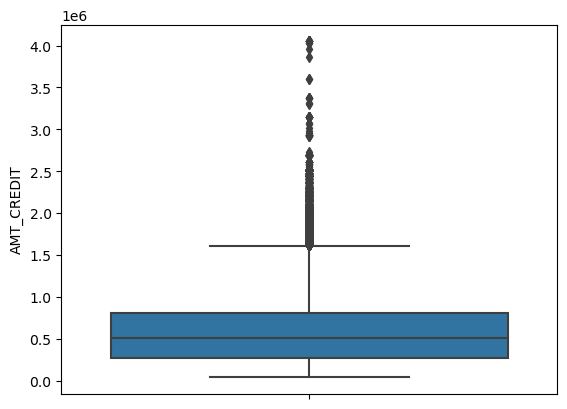

In [1149]:
sns.boxplot(data = df1, y = df1.AMT_CREDIT);

In [1150]:
df1.AMT_CREDIT.describe().round(2)

count     307233.00
mean      599315.00
std       402517.71
min        45000.00
25%       270000.00
50%       514602.00
75%       808650.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64

In [1151]:
df1.AMT_CREDIT.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     514602.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1855755.0
Name: AMT_CREDIT, dtype: float64

In [1152]:
# No outliers present

In [1153]:
# the unique values of CODE_GENDER column are 'M', 'F', 'XNA' , which should only be M/F
# so need to get rid of XNA

df1.CODE_GENDER.unique()


array(['M', 'F', 'XNA'], dtype=object)

In [1154]:
df1.CODE_GENDER.value_counts()

# F occurs more than M, about two times more in the column so replacing XNA with F should be best option.

F      202259
M      104970
XNA         4
Name: CODE_GENDER, dtype: int64

In [1155]:
df1.CODE_GENDER.mode()


0    F
dtype: object

In [1156]:
df1.CODE_GENDER.replace(df1.CODE_GENDER.unique()[2], df1.CODE_GENDER.unique()[1], inplace = True)

In [1157]:
df1.CODE_GENDER.unique()

array(['M', 'F'], dtype=object)

In [1158]:
df1.CODE_GENDER.value_counts()

F    202263
M    104970
Name: CODE_GENDER, dtype: int64

In [1159]:
sns.boxplot(data = df1, y = df1.Age);



In [1160]:
df1.Age.describe()

# no outliers

count    307233.000000
mean         43.943434
std          11.963627
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: Age, dtype: float64

# UNIVARIATE ANALYSIS

In [1161]:
# The columns of df1

df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUM

In [1162]:
df1.groupby('TARGET').size()
# there are two unique values in this variable
# looks like 0 is utilized the most with more than 280000 times

TARGET
0    282429
1     24804
dtype: int64

In [1163]:
df1.groupby('TARGET').size().sum()

307233

In [1164]:
# percentage of clients which have difficulty in paying is 8%
# all other 92% clients dont have difficulty in paying
# most clients donot default in loans

df1.groupby('TARGET').size()/df1.groupby('TARGET').size().sum()

TARGET
0    0.919266
1    0.080734
dtype: float64

In [1165]:
# Now lets plot a bar chart for TARGET varaiable

(df1.groupby('TARGET').size()/df1.groupby('TARGET').size().sum()).plot.bar();


In [1166]:
# Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the
# first Y installments of the loan in our sample, 0 - all other cases)
# here there are less people who couldnt repay their loans and more than 90% can repay their loans

In [1167]:
# similarly, we plot bar plot for CODE_GENDER
# we see that the most value counts is of F than M

In [1168]:
(df1.groupby('CODE_GENDER').size()/df1.groupby('CODE_GENDER').size().sum()).plot.bar();


In [1169]:
# most of the people in the dataset are Female which are more than 60%  and more than 30% are males

In [1170]:
# similarly, we plot bar plot for NAME_CONTRACT_TYPE

(df1.groupby('NAME_CONTRACT_TYPE').size()/df1.groupby('NAME_CONTRACT_TYPE').size().sum()).plot.bar();

In [1171]:
# the most number of loans taken is cash loans rather than revolving loans

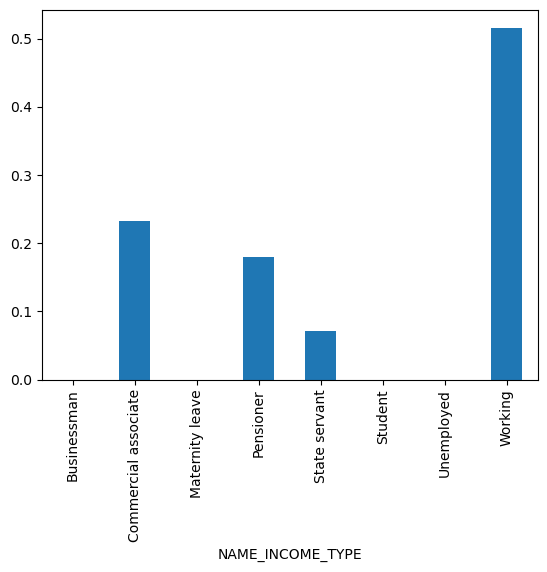

In [1172]:
# similarly, we plot bar plot for NAME_INCOME_TYPE

(df1.groupby('NAME_INCOME_TYPE').size()/df1.groupby('NAME_INCOME_TYPE').size().sum()).plot.bar();

In [1173]:
# the most number of clients income type is that of working  and then followed by commercial associate and then prisoners and\
# state servant

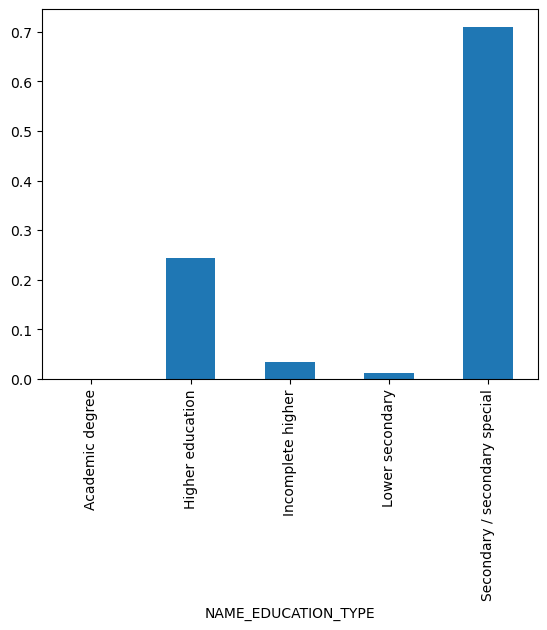

In [1174]:
# similarly, we plot bar plot for NAME_EDUCATION_TYPE

(df1.groupby('NAME_EDUCATION_TYPE').size()/df1.groupby('NAME_EDUCATION_TYPE').size().sum()).plot.bar();

In [1175]:
# most of the clients education is Secondary level and then higher education and then followed by incomplete higher education

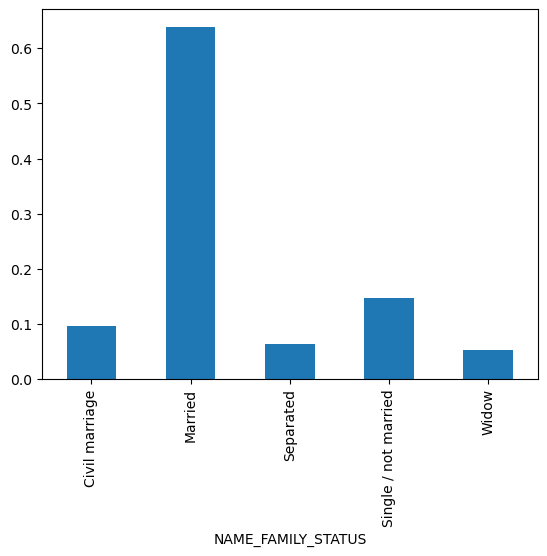

In [1176]:
# similarly, we plot bar plot for NAME_FAMILY_STATUS

(df1.groupby('NAME_FAMILY_STATUS').size()/df1.groupby('NAME_FAMILY_STATUS').size().sum()).plot.bar();

In [1177]:
# most of the clients are married and then followed by single 

In [1178]:
# similarly, we plot bar plot for NAME_HOUSING_TYPE

(df1.groupby('NAME_HOUSING_TYPE').size()/df1.groupby('NAME_HOUSING_TYPE').size().sum()).plot.bar();

In [1179]:
# most of the clients have housing and apartments and followed by living with parents

In [1180]:
#################################################################

In [1181]:
fl = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
plt.figure(figsize=(30,15))
i =1
for x in fl:
    i = i+1
    plt.subplot(6,6,i)
    df1[x].value_counts().plot.bar()
    plt.title(x)

In [1182]:
# these are plots for the documents that the clients have provided
# and the bar plot shows most documents are provided by the client
# for 3 documents the some number of clients havent submitted which is for Flag_Document_3, Flag_Document_6 and Flag_Document_8
# 50000 clients havent provided Flag_Document_3
# less than 100000 clients havent provided Flag_Document_6
# less than 100000 clients havent provided Flag_Document_8


In [1183]:
# apart from these three columns the rest of the flag document columns we can get rid of

df1 = df1.loc[:, ~(df1.columns.isin(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7','FLAG_DOCUMENT_9',\
                               'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',\
                               'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',\
                               'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']))]


In [1184]:
# only 3 reuired Flag_Document columns are in the dataframe

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307233 non-null  int64  
 1   TARGET                       307233 non-null  int64  
 2   NAME_CONTRACT_TYPE           307233 non-null  object 
 3   CODE_GENDER                  307233 non-null  object 
 4   FLAG_OWN_CAR                 307233 non-null  object 
 5   FLAG_OWN_REALTY              307233 non-null  object 
 6   CNT_CHILDREN                 307233 non-null  int64  
 7   AMT_INCOME_TOTAL             307233 non-null  float64
 8   AMT_CREDIT                   307233 non-null  float64
 9   AMT_ANNUITY                  307233 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307233 non-null  object 
 12  NAME_EDUCATION_TYPE          307233 non-null  object 
 13 

In [1185]:
############################################################################

In [1186]:
# number of columns is 38

df1.shape

(307233, 38)

In [1187]:
# the number of records in which the clients are able to repay are 282429 which is a lot more than 24804  


len(df1[df1.TARGET == 1]), len(df1[df1.TARGET == 0])

(24804, 282429)

In [1188]:
df1[df1.TARGET == 1]['CODE_GENDER'].value_counts(normalize = True)

F    0.570553
M    0.429447
Name: CODE_GENDER, dtype: float64

In [1189]:
df1[df1.TARGET == 0]['CODE_GENDER'].value_counts(normalize = True)


F    0.666047
M    0.333953
Name: CODE_GENDER, dtype: float64

In [1190]:
df1.groupby('TARGET')['CODE_GENDER'].value_counts()

TARGET  CODE_GENDER
0       F              188111
        M               94318
1       F               14152
        M               10652
Name: CODE_GENDER, dtype: int64

In [1191]:
# now plotting for TARGET vs CODE_GENDER

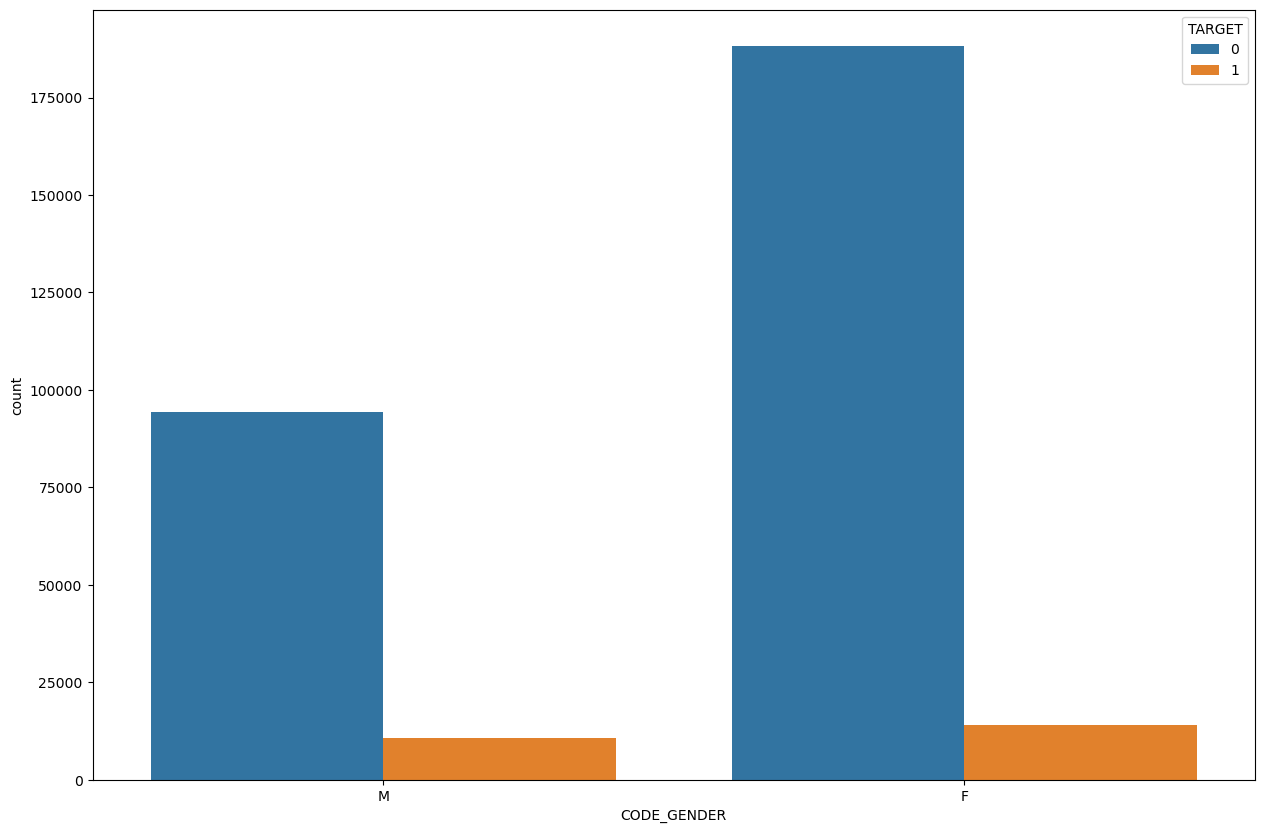

In [1192]:
plt.figure(figsize=(15,10))
plt.subplot(1,1,1)
sns.countplot(data=df1, x='CODE_GENDER', hue='TARGET');

In [1193]:
# most clients are female
# most male clients are able to repar the loan
# most female clients are able to repay the loan
# less than 12000 male clients and female clients are unable to repay the loan

In [1194]:
# Now analysing the relation between TARGET and NAME_CONTRACT_TYPE

In [1195]:
df1[df1.TARGET == 1]['NAME_CONTRACT_TYPE'].value_counts(normalize = True)

Cash loans         0.93618
Revolving loans    0.06382
Name: NAME_CONTRACT_TYPE, dtype: float64

In [1196]:
df1[df1.TARGET == 0]['NAME_CONTRACT_TYPE'].value_counts(normalize = True)

Cash loans         0.902921
Revolving loans    0.097079
Name: NAME_CONTRACT_TYPE, dtype: float64

In [1197]:
df1.groupby('TARGET')['NAME_CONTRACT_TYPE'].value_counts()

TARGET  NAME_CONTRACT_TYPE
0       Cash loans            255011
        Revolving loans        27418
1       Cash loans             23221
        Revolving loans         1583
Name: NAME_CONTRACT_TYPE, dtype: int64

In [1198]:
# more than 250,000  clients are able to repay the cash loan
# more than 23,000  clients are able to repay the revolving loan

# more than 27,000  clients are not able to repay the cash loan
# moe than 1500  clients are not able to repay the revolving loan

# more people have taken cash loan rather than revolving loan and most of them are able to repay the loan

In [1199]:
plt.figure(figsize=(15,10))
plt.subplot(1,1,1)
sns.countplot(data=df1, x='NAME_CONTRACT_TYPE', hue='TARGET');

In [1200]:
# Lets analyse the relation between TARGET and FLAG_OWN_CAR

In [1201]:
df1[df1.TARGET == 1]['FLAG_OWN_CAR'].value_counts(normalize = True)

N    0.694565
Y    0.305435
Name: FLAG_OWN_CAR, dtype: float64

In [1202]:
df1[df1.TARGET == 0]['FLAG_OWN_CAR'].value_counts(normalize = True)

N    0.656512
Y    0.343488
Name: FLAG_OWN_CAR, dtype: float64

In [1203]:
df1.groupby('TARGET')['FLAG_OWN_CAR'].value_counts()

TARGET  FLAG_OWN_CAR
0       N               185418
        Y                97011
1       N                17228
        Y                 7576
Name: FLAG_OWN_CAR, dtype: int64

In [1204]:
plt.figure(figsize=(15,10))
plt.subplot(1,1,1)
sns.histplot(data=df1, x='FLAG_OWN_CAR', hue='TARGET', multiple='dodge', discrete=True);


In [1205]:
# more than 180,000 clients who can repay loan donot own  a car
# more than 97,000 clients who can repay loan  possess a car

# more than 17,000 clients who cannot repay the loan donot own a car
# more than 7,500 clients who cannot repay the loan own a car

# so most number of clients who can repay the loans donot own a car

In [1206]:
# lets aalyse the relation between NAME_INCOME_TYPE and TARGET

In [1207]:
df1[df1.TARGET == 1]['NAME_INCOME_TYPE'].value_counts(normalize = True)

Working                 0.613208
Commercial associate    0.215973
Pensioner               0.120142
State servant           0.050274
Unemployed              0.000323
Maternity leave         0.000081
Name: NAME_INCOME_TYPE, dtype: float64

In [1208]:
df1[df1.TARGET == 0]['NAME_INCOME_TYPE'].value_counts(normalize = True)

Working                 0.507664
Commercial associate    0.234441
Pensioner               0.185388
State servant           0.072347
Student                 0.000064
Unemployed              0.000050
Businessman             0.000035
Maternity leave         0.000011
Name: NAME_INCOME_TYPE, dtype: float64

In [1209]:
df1.groupby('TARGET')['NAME_INCOME_TYPE'].value_counts()

TARGET  NAME_INCOME_TYPE    
0       Working                 143379
        Commercial associate     66213
        Pensioner                52359
        State servant            20433
        Student                     18
        Unemployed                  14
        Businessman                 10
        Maternity leave              3
1       Working                  15210
        Commercial associate      5357
        Pensioner                 2980
        State servant             1247
        Unemployed                   8
        Maternity leave              2
Name: NAME_INCOME_TYPE, dtype: int64

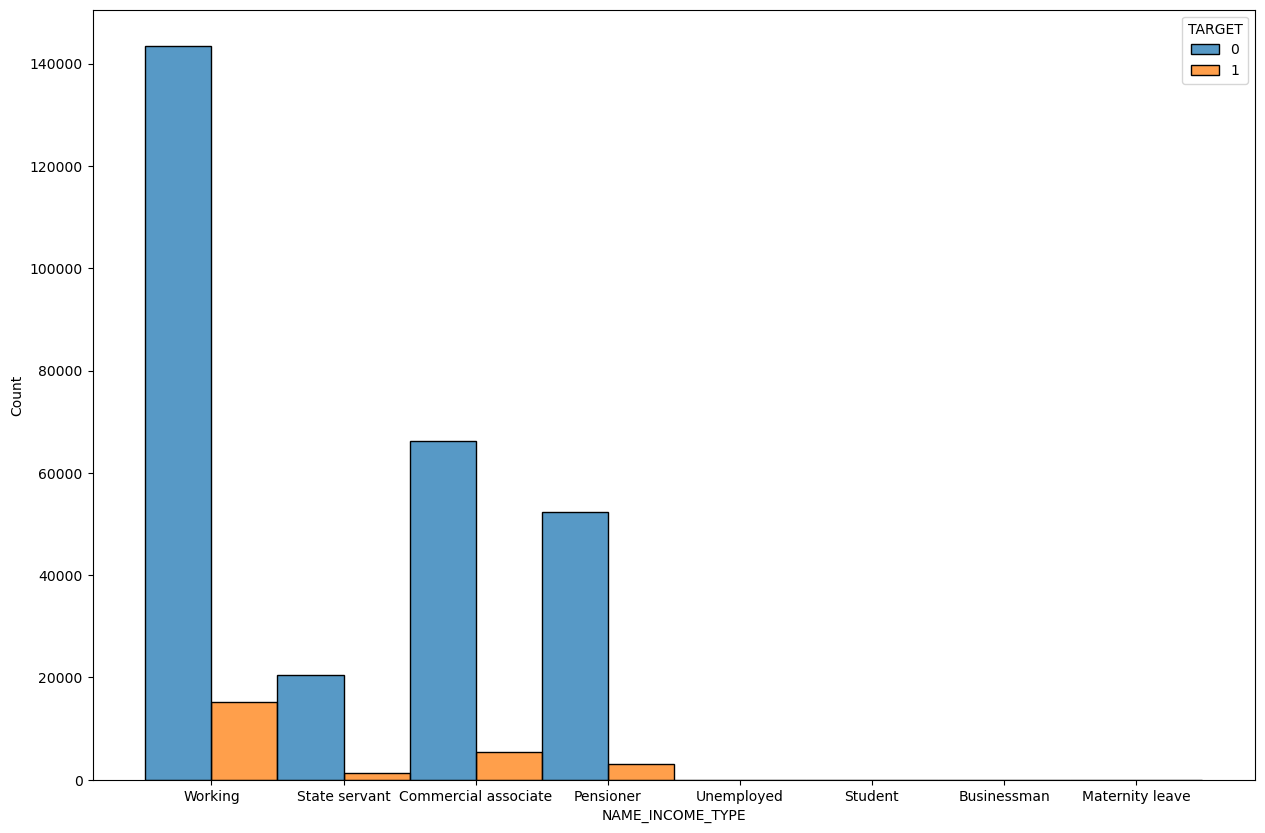

In [1210]:
plt.figure(figsize=(15,10))
plt.subplot(1,1,1)
sns.histplot(data=df1, x='NAME_INCOME_TYPE', hue='TARGET', multiple='dodge', discrete=True);


In [1211]:
# clients who have a working income type are more likely to repay the loan because 198,684 are able to repay 
# and 15,210 are unable to pay

# clients who have a Commercial associate income type are more likely to repay the loan as 66,213 can repay the loan and 5,357 are unable to
# repay the loan

# clients who have Pensioner income type are also likely to repay as 52,359 are able to repay and 2,980 are not able to.

# clients having state servant income type are likely to repay as 20,433 are likely to pay and 1,247 are not able to.

# clients having student type are all likely to repay the loan

# clients having unemployment income type are also most like to pay since 14 out of 22 are able to pay.

# clients having businessman as income type are all likely to repay the loan like student income type.

# clients having maternity leave as income type half of them are able to repay the loan.

In [1212]:
# Lets look at the relation between TARGET and EDUCATION_TYPE

In [1213]:
df1[df1.TARGET == 1]['NAME_EDUCATION_TYPE'].value_counts(normalize = True)

Secondary / secondary special    0.786446
Higher education                 0.161506
Incomplete higher                0.035115
Lower secondary                  0.016812
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

In [1214]:
df1[df1.TARGET == 0]['NAME_EDUCATION_TYPE'].value_counts(normalize = True)

Secondary / secondary special    0.703483
Higher education                 0.250654
Incomplete higher                0.033269
Lower secondary                  0.012024
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

In [1215]:
df1.groupby('TARGET')['NAME_EDUCATION_TYPE'].value_counts()

TARGET  NAME_EDUCATION_TYPE          
0       Secondary / secondary special    198684
        Higher education                  70792
        Incomplete higher                  9396
        Lower secondary                    3396
        Academic degree                     161
1       Secondary / secondary special     19507
        Higher education                   4006
        Incomplete higher                   871
        Lower secondary                     417
        Academic degree                       3
Name: NAME_EDUCATION_TYPE, dtype: int64

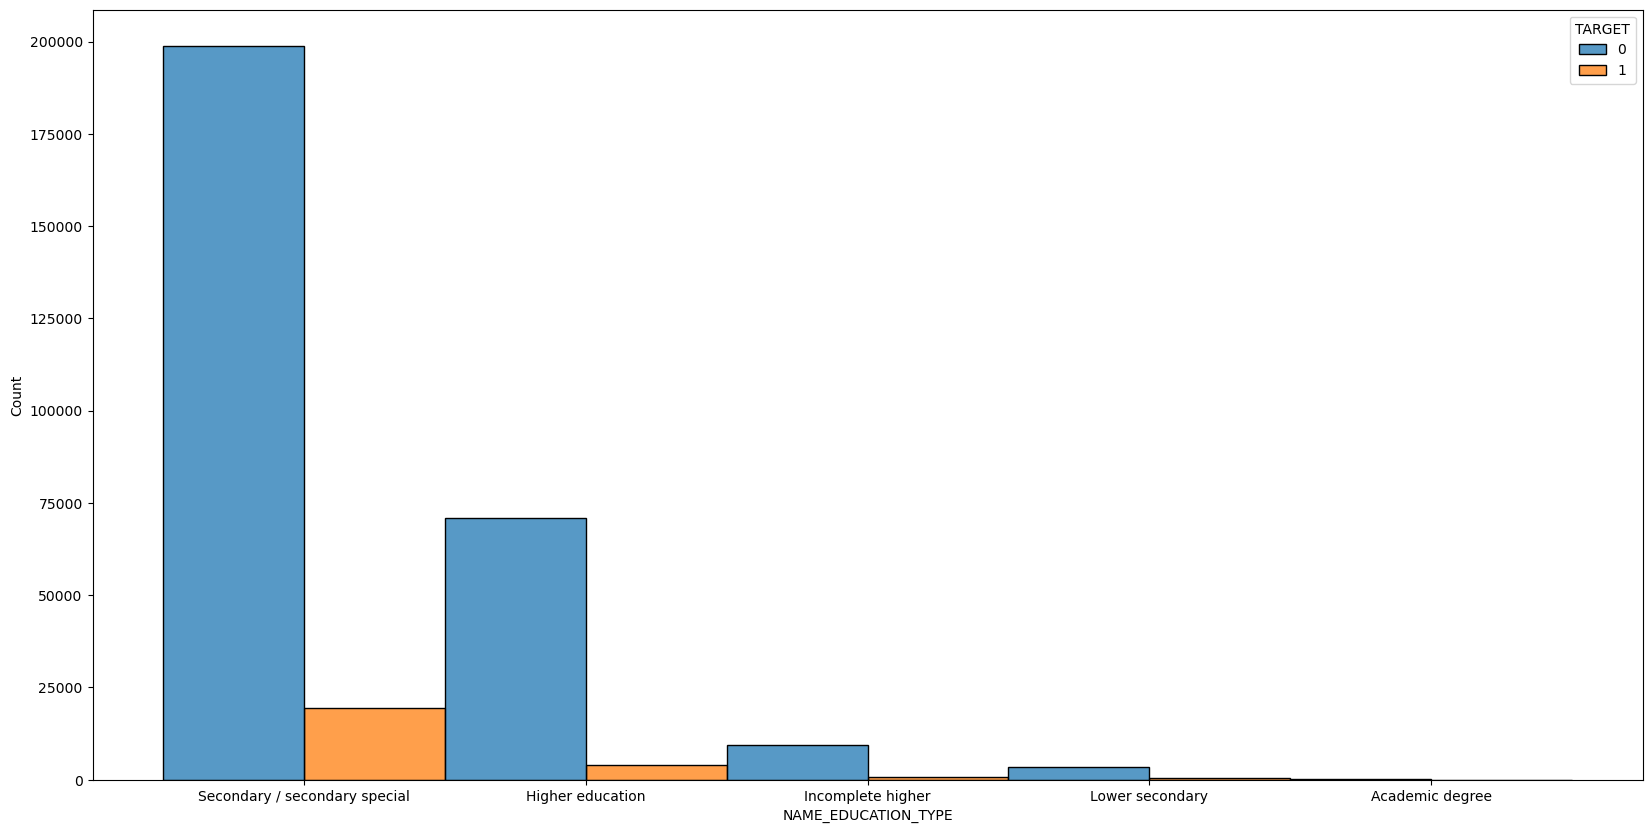

In [1216]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.histplot(data=df1, x='NAME_EDUCATION_TYPE', hue='TARGET', multiple='dodge', discrete=True);


In [1217]:
# clients who have a secondary/secondary education are more likely to repay the loan because 198,684 are able to repay 
# and 19,507 are unable to pay

# clients who have a higher education are more likely to repay the loan as 70,792 can repay the loan and 4,006 are unable to
# repay the loan

# clients who have incomplete higher education are also likely to repay as 9,393 are able to repay and 871 are not able to.

# clients having lower secondary most of them are likely to repay

# clients having academic degree are also more likely to repay





In [1218]:
# Now lets analyse relation between TARGET and FLAG_OWN_CAR

In [1219]:
df1[df1.TARGET == 1]['FLAG_OWN_CAR'].value_counts(normalize = True)

N    0.694565
Y    0.305435
Name: FLAG_OWN_CAR, dtype: float64

In [1220]:
df1[df1.TARGET == 0]['FLAG_OWN_CAR'].value_counts(normalize = True)

N    0.656512
Y    0.343488
Name: FLAG_OWN_CAR, dtype: float64

In [1221]:
df1.groupby('TARGET')['FLAG_OWN_CAR'].value_counts()

TARGET  FLAG_OWN_CAR
0       N               185418
        Y                97011
1       N                17228
        Y                 7576
Name: FLAG_OWN_CAR, dtype: int64

In [1222]:
df1[df1.TARGET == 1]['FLAG_OWN_CAR'].value_counts(normalize = True)

N    0.694565
Y    0.305435
Name: FLAG_OWN_CAR, dtype: float64

In [1223]:
df1[df1.TARGET == 0]['FLAG_OWN_CAR'].value_counts(normalize = True)

N    0.656512
Y    0.343488
Name: FLAG_OWN_CAR, dtype: float64

In [1224]:
df1.groupby('TARGET')['FLAG_OWN_CAR'].value_counts()

TARGET  FLAG_OWN_CAR
0       N               185418
        Y                97011
1       N                17228
        Y                 7576
Name: FLAG_OWN_CAR, dtype: int64

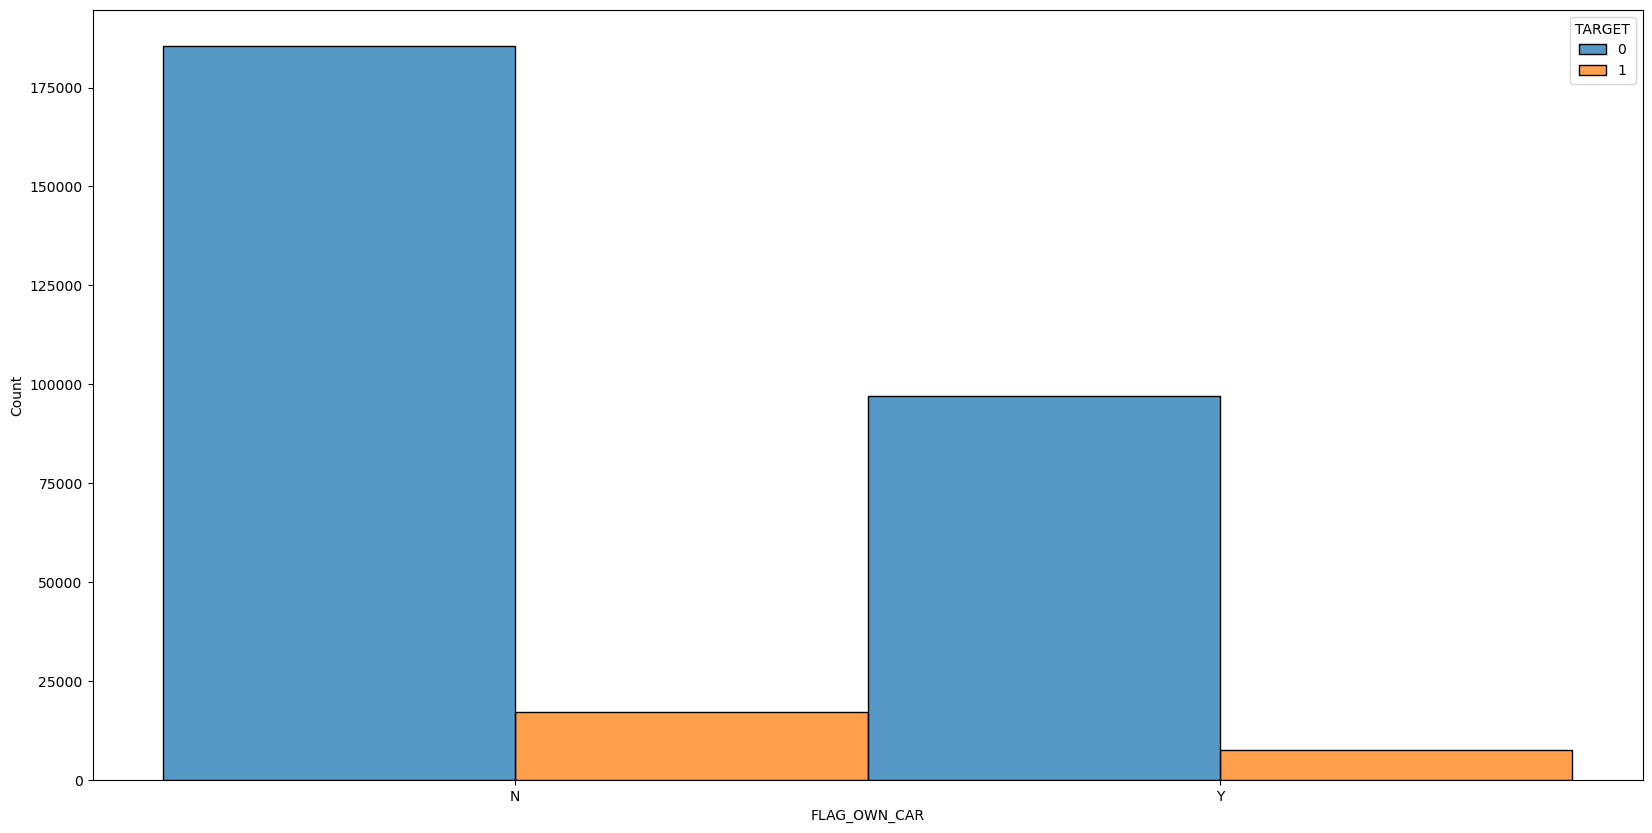

In [1225]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.histplot(data=df1, x='FLAG_OWN_CAR', hue='TARGET', multiple='dodge', discrete=True);


In [1226]:
# clients who down own a car are more than clients with a car
# clients who are donot have a car are more likely to repay the loan than whose without as more than 185000 can repay and more than 17000 are unable to.
# clients with car are more likely to pay the loan as more than 95000 can repay & more than 7500 are unable to.
# Out of over 100,000 more than 95,000 clients with a car are able to repay the loan.
# from more than 200,000 clients without a car, more than 185,000 are able to repay the lean while the rest are not able to repay.
# So comparing clients with a car, their performance is better as  compared to clients without a car.

In [1227]:
# lets analyse the relation between TARGET and NAME_HOUSING_TYPE

In [1228]:
df1[df1.TARGET == 1]['NAME_HOUSING_TYPE'].value_counts(normalize = True)

House / apartment      0.856918
With parents           0.069948
Municipal apartment    0.038462
Rented apartment       0.024190
Office apartment       0.006894
Co-op apartment        0.003588
Name: NAME_HOUSING_TYPE, dtype: float64

In [1229]:
df1[df1.TARGET == 0]['NAME_HOUSING_TYPE'].value_counts(normalize = True)

House / apartment      0.890061
With parents           0.046337
Municipal apartment    0.036158
Rented apartment       0.015140
Office apartment       0.008654
Co-op apartment        0.003650
Name: NAME_HOUSING_TYPE, dtype: float64

In [1230]:
df1.groupby('TARGET')['NAME_HOUSING_TYPE'].value_counts()

TARGET  NAME_HOUSING_TYPE  
0       House / apartment      251379
        With parents            13087
        Municipal apartment     10212
        Rented apartment         4276
        Office apartment         2444
        Co-op apartment          1031
1       House / apartment       21255
        With parents             1735
        Municipal apartment       954
        Rented apartment          600
        Office apartment          171
        Co-op apartment            89
Name: NAME_HOUSING_TYPE, dtype: int64

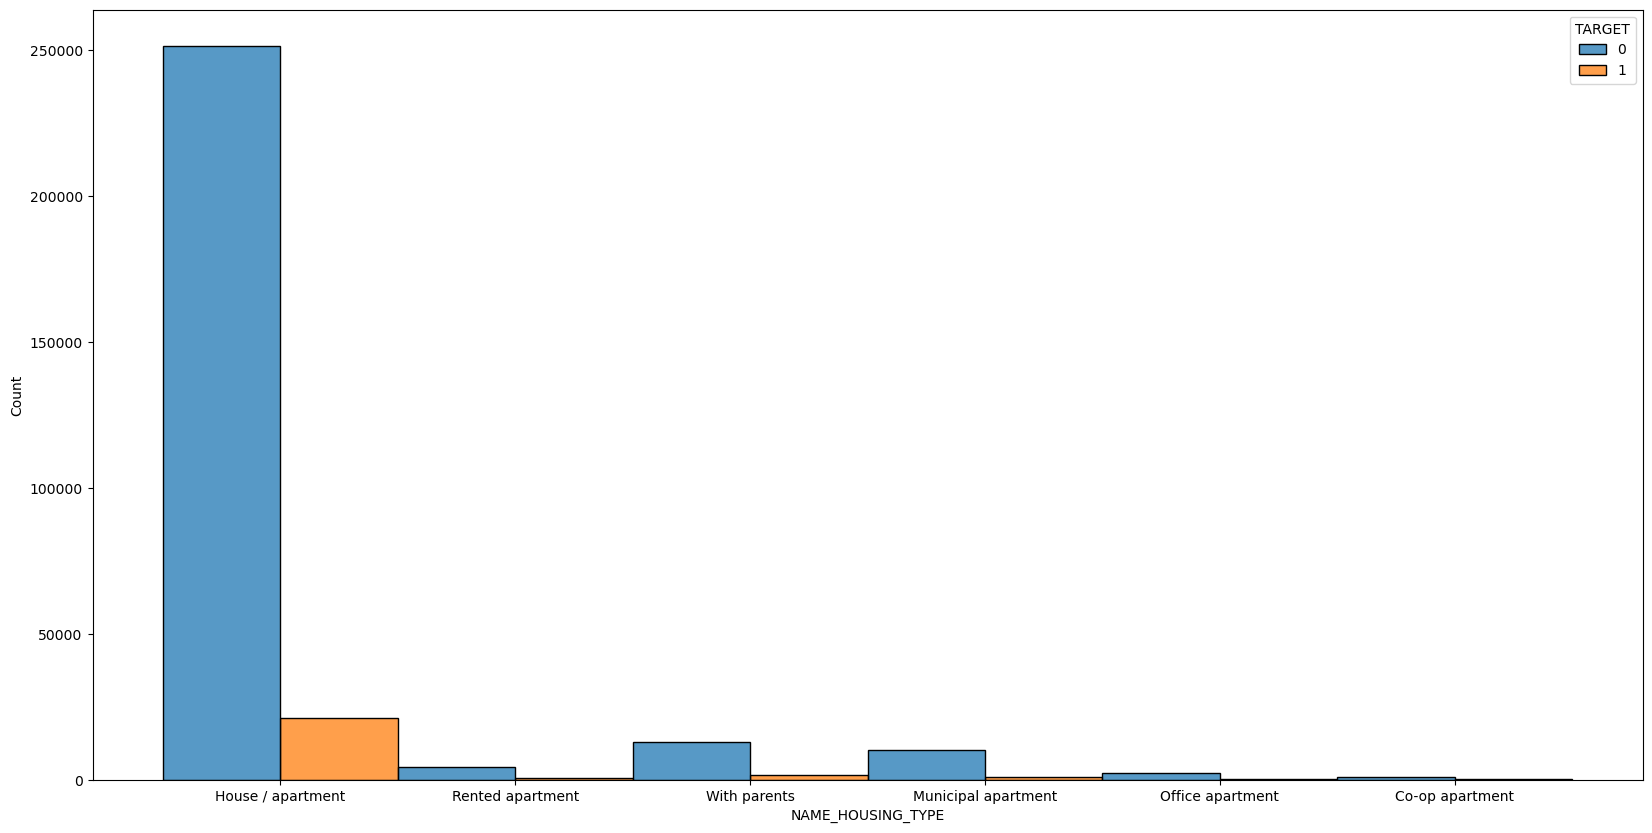

In [1231]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.histplot(data=df1, x='NAME_HOUSING_TYPE', hue='TARGET', multiple='dodge', discrete=True);


In [1232]:

# clients having house or apartment are more likely to repay the loan as out of more than 270,000 more than 250,000 are able to.

# clients who are living with parents  are also likely to repay as out of more than 14,000 more than 13,000 are able to.

# clients having municipital apartment, out of more than 11,000 more than 10,000 are able to repay.

# clients having rented apartment, out of more than 4000 more than 4000 are able to repay.

# clients having office apartment, out of more than 2500 more than 2400 are able to repay.

# clients having coop apartment, out of more than 1100 more than 1,000 are able to repay.


In [1233]:
# Now lets analyse the relation between ORGANIZATION_TYPE and TARGET

In [1234]:
df1[df1.TARGET == 1]['ORGANIZATION_TYPE'].value_counts(normalize = True).head()

Business Entity Type 3    0.254717
Self-employed             0.157313
XNA                       0.120464
Other                     0.051403
Business Entity Type 2    0.036244
Name: ORGANIZATION_TYPE, dtype: float64

In [1235]:
df1[df1.TARGET == 0]['ORGANIZATION_TYPE'].value_counts(normalize = True).head()

Business Entity Type 3    0.218161
XNA                       0.185406
Self-employed             0.122006
Other                     0.054506
Medicine                  0.036986
Name: ORGANIZATION_TYPE, dtype: float64

In [1236]:
df1.groupby('TARGET')['ORGANIZATION_TYPE'].value_counts()

TARGET  ORGANIZATION_TYPE     
0       Business Entity Type 3    61615
        XNA                       52364
        Self-employed             34458
        Other                     15394
        Medicine                  10446
        Government                 9665
        Business Entity Type 2     9643
        School                     8357
        Trade: type 7              7086
        Kindergarten               6389
        Construction               5929
        Business Entity Type 1     5495
        Transport: type 4          4891
        Industry: type 9           3142
        Trade: type 3              3128
        Industry: type 3           2928
        Security                   2918
        Housing                    2719
        Military                   2495
        Industry: type 11          2469
        Bank                       2375
        Police                     2220
        Agriculture                2195
        Transport: type 2          2031
        P

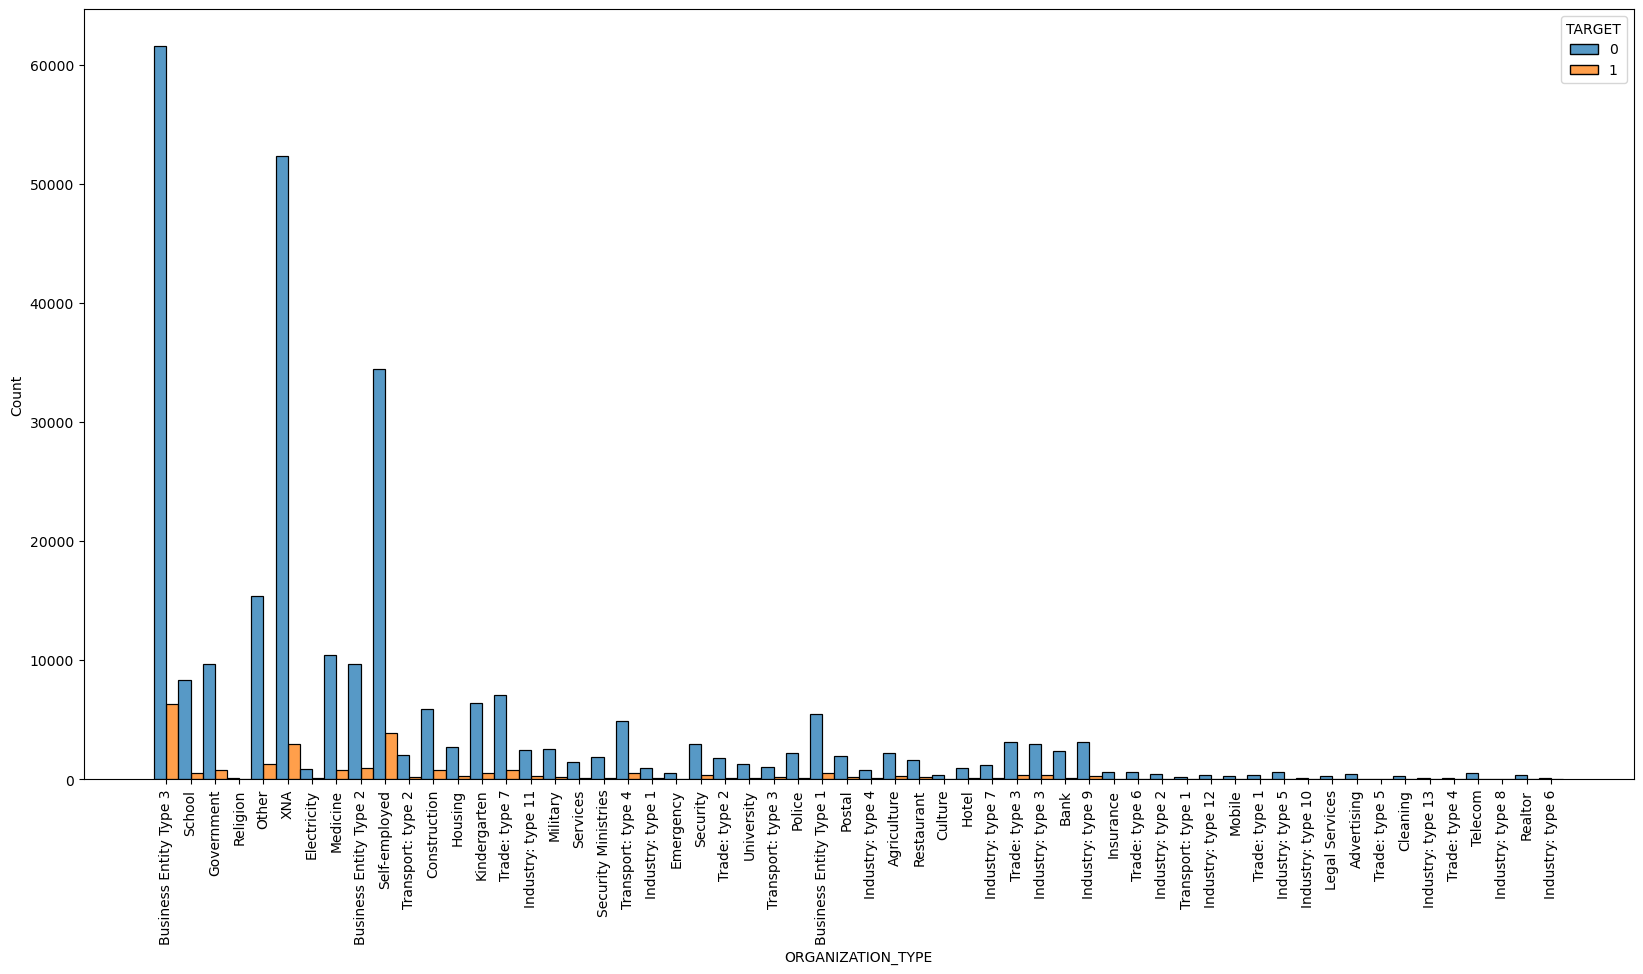

In [1237]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.histplot(data=df1, x='ORGANIZATION_TYPE', hue='TARGET', multiple='dodge', discrete=True);
plt.xticks(rotation = 90);

In [1238]:
len(df1['ORGANIZATION_TYPE'].unique())

58

In [1239]:
df1.groupby('ORGANIZATION_TYPE').size()

ORGANIZATION_TYPE
Advertising                 429
Agriculture                2451
Bank                       2505
Business Entity Type 1     5982
Business Entity Type 2    10542
Business Entity Type 3    67933
Cleaning                    260
Construction               6714
Culture                     378
Electricity                 949
Emergency                   560
Government                10391
Hotel                       966
Housing                    2953
Industry: type 1           1039
Industry: type 10           109
Industry: type 11          2703
Industry: type 12           369
Industry: type 13            66
Industry: type 2            458
Industry: type 3           3276
Industry: type 4            877
Industry: type 5            599
Industry: type 6            112
Industry: type 7           1307
Industry: type 8             24
Industry: type 9           3367
Insurance                   596
Kindergarten               6872
Legal Services              305
Medicine              

In [1240]:
# The plot give us the following information:

# clients having Business Entity Type 3 as occupation are the most to apply and they are the most likely to repay since more than 60000 are able to pay the loan as compared to less than 8000 who cannot

# School are the most likely to repay since near to 10,000 are able to pay the loan as compared to less than 2000 who cannot

# Governmentare the most likely to repay since more than 60000 are able to pay the loan as compared to less than 3000 who cannot

# Religion are the most likely to repay since they donot take much loan as everyone else.

# Other are the most likely to repay since more than 16000 are able to pay the loan as compared to less than 4000 who cannot

# Electricity are the most likely to repay since more than 60000 are able to pay the loan as compared to less than 10000 who cannot

# Medicine are the most likely to repay since near to 10000 are able to pay the loan as compared to less than 3000 who cannot

# Business Entity Type 2 are the most likely to repay since near to 10000 are able to pay the loan as compared to less than 3000 who cannot

# Self-employed are the most likely to repay about 35000 are able to pay the loan as compared to less than 5000 who cannot


In [1241]:
# lets analyse the occupation type and target

In [1242]:
df1[df1.TARGET == 1]['OCCUPATION_TYPE'].value_counts(normalize = True)

Laborers                 0.314733
Sales staff              0.166703
Drivers                  0.113708
Core staff               0.093632
Managers                 0.071560
Security staff           0.038910
High skill tech staff    0.037831
Cooking staff            0.033513
Medicine staff           0.030815
Accountants              0.025580
Cleaning staff           0.024123
Low-skill Laborers       0.019374
Private service staff    0.009390
Waiters/barmen staff     0.008203
Secretaries              0.004965
Realty agents            0.003184
HR staff                 0.001943
IT staff                 0.001835
Name: OCCUPATION_TYPE, dtype: float64

In [1243]:
df1[df1.TARGET == 0]['OCCUPATION_TYPE'].value_counts(normalize = True)

Laborers                 0.256289
Sales staff              0.150622
Core staff               0.134096
Managers                 0.104081
Drivers                  0.085684
High skill tech staff    0.055466
Accountants              0.048490
Medicine staff           0.041363
Security staff           0.031148
Cooking staff            0.027650
Cleaning staff           0.021838
Private service staff    0.012861
Low-skill Laborers       0.009009
Secretaries              0.006306
Waiters/barmen staff     0.006207
Realty agents            0.003597
HR staff                 0.002740
IT staff                 0.002552
Name: OCCUPATION_TYPE, dtype: float64

In [1244]:
df1.groupby('TARGET')['OCCUPATION_TYPE'].value_counts()

TARGET  OCCUPATION_TYPE      
0       Laborers                 49302
        Sales staff              28975
        Core staff               25796
        Managers                 20022
        Drivers                  16483
        High skill tech staff    10670
        Accountants               9328
        Medicine staff            7957
        Security staff            5992
        Cooking staff             5319
        Cleaning staff            4201
        Private service staff     2474
        Low-skill Laborers        1733
        Secretaries               1213
        Waiters/barmen staff      1194
        Realty agents              692
        HR staff                   527
        IT staff                   491
1       Laborers                  5832
        Sales staff               3089
        Drivers                   2107
        Core staff                1735
        Managers                  1326
        Security staff             721
        High skill tech staff     

In [1245]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
plt.xticks(rotation = 45)
sns.histplot(data=df1, x='OCCUPATION_TYPE', hue='TARGET', multiple='dodge', discrete=True);


In [1246]:
# the most number of applicants are from the laborers occupation.

# clients who are laborers, near to 50000 are able to repay while about 5000 are not able to

# clients who are core staff, more than 25000 are able to repay while about 2000 are not able to

# clients who are accountants, close to 10000 are able to repay while about 1000 are not able to

# clients who are managers, close to 20000 are able to repay while about 2000 are not able to

# clients who are drivers, more than 16000 are able to repay while about 3000 are not able to

# clients who are sales staff, close to 30000 are able to repay while about 4000 are not able to


# BIVARIATE ANALYSIS

In [1247]:
plt.style.use('ggplot')

plt.figure(figsize = (14,3))

plt.subplot(1,2,1)
sns.distplot(df1[df1.TARGET == 1]['AMT_INCOME_TOTAL'], color = 'Green');
plt.title('TARGET = 1')

plt.subplot(1,2,2)
sns.distplot(df1[df1.TARGET == 0]['AMT_INCOME_TOTAL'], color = 'Green')
plt.title('TARGET = 0');


In [1248]:
# the distribution of credit amount of loan for clients who are not able to to repay the loans is very high betweeen 100,000-150,000
# the distribution of credit amount of loan for clients who are able to to repay the loans is very high betweeen 100,000-150,000


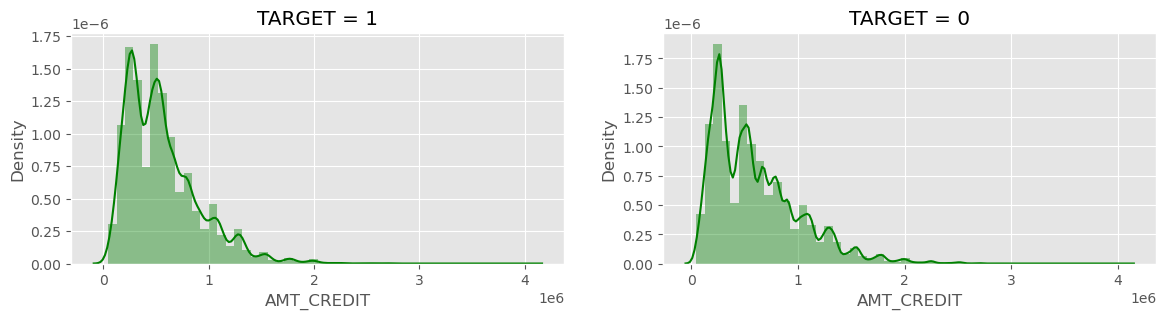

In [1249]:
plt.style.use('ggplot')

plt.figure(figsize = (14,3))

plt.subplot(1,2,1)
sns.distplot(df1[df1.TARGET == 1]['AMT_CREDIT'], color = 'Green');
plt.title('TARGET = 1')

plt.subplot(1,2,2)
sns.distplot(df1[df1.TARGET == 0]['AMT_CREDIT'], color = 'Green')
plt.title('TARGET = 0');


In [1250]:
# the distribution of credit amount of loan for clients who are not able to to repay the loans is very high betweeen 0.2-0.7
# the distribution of credit amount of loan for clients who are not able to to repay the loans is very high betweeen 0.2-0.4

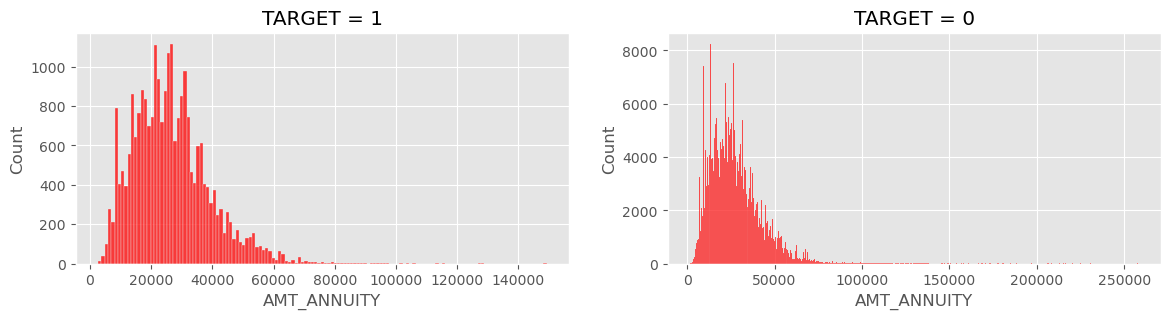

In [1251]:
plt.style.use('ggplot')

plt.figure(figsize = (14,3))

plt.subplot(1,2,1)
sns.histplot(df1[df1.TARGET == 1]['AMT_ANNUITY'], color = 'Red');
plt.title('TARGET = 1')

plt.subplot(1,2,2)
sns.histplot(df1[df1.TARGET == 0]['AMT_ANNUITY'], color = 'Red');
plt.title('TARGET = 0');


In [1252]:
# the clients who are not able to repay the loans have highest loan annuity between 20,000 and 30,000
# the clients who are able to repay the loans have highest loan annuity between 20,000 and 30,000



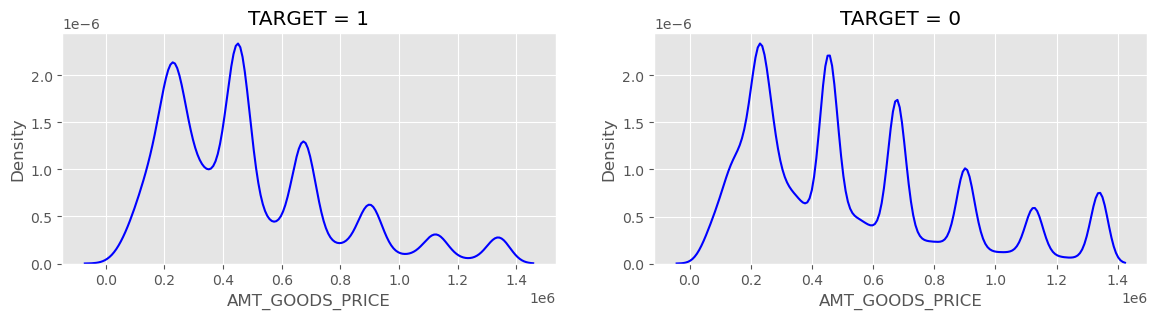

In [1253]:
plt.style.use('ggplot')

plt.figure(figsize = (14,3))

plt.subplot(1,2,1)
sns.kdeplot(df1[df1.TARGET == 1]['AMT_GOODS_PRICE'], color = 'Blue');
plt.title('TARGET = 1')

plt.subplot(1,2,2)
sns.kdeplot(df1[df1.TARGET == 0]['AMT_GOODS_PRICE'], color = 'Blue');
plt.title('TARGET = 0');


In [1254]:
# the clients who are not able to repay the loans have highest distribution of price of goods for the loan is highest in points 0.2 and 0.4
# the clients who are able to repay the loans have highest distribution of price of goods for the loan is highest in points 0.2, 0.4 and 0.6.


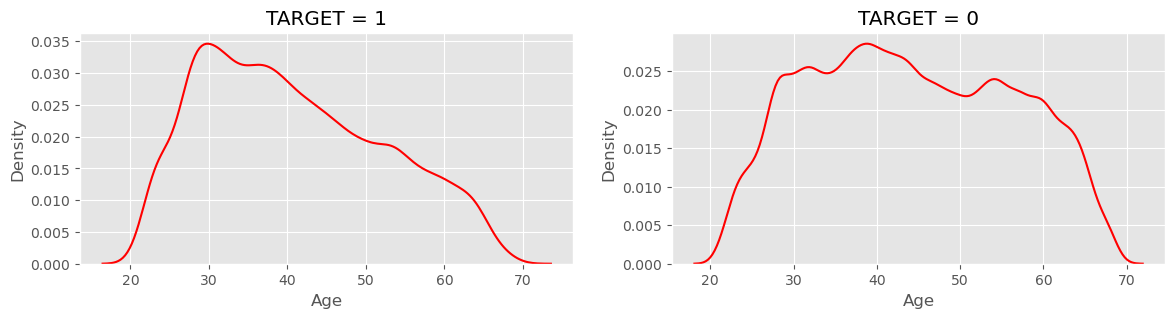

In [1255]:
plt.style.use('ggplot')

plt.figure(figsize = (14,3))

plt.subplot(1,2,1)
sns.kdeplot(df1[df1.TARGET == 1]['Age'], color = 'Red');
plt.title('TARGET = 1')

plt.subplot(1,2,2)
sns.kdeplot(df1[df1.TARGET == 0]['Age'], color = 'Red');
plt.title('TARGET = 0');


In [1256]:
# the clients who are not able to repay the loans have highest distribution of age  in the range 25-35
# the clients who are able to repay the loans have highest distribution of age  in the range 35-40


In [1257]:
##########################################################

In [1258]:
catCols = ['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE','NAME_CONTRACT_STATUS']

numCols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2', 'EXT_SOURCE_3','Age']


In [1259]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307233 non-null  int64  
 1   TARGET                       307233 non-null  int64  
 2   NAME_CONTRACT_TYPE           307233 non-null  object 
 3   CODE_GENDER                  307233 non-null  object 
 4   FLAG_OWN_CAR                 307233 non-null  object 
 5   FLAG_OWN_REALTY              307233 non-null  object 
 6   CNT_CHILDREN                 307233 non-null  int64  
 7   AMT_INCOME_TOTAL             307233 non-null  float64
 8   AMT_CREDIT                   307233 non-null  float64
 9   AMT_ANNUITY                  307233 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307233 non-null  object 
 12  NAME_EDUCATION_TYPE          307233 non-null  object 
 13 

In [1260]:
num_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'EXT_SOURCE_2',\
               'EXT_SOURCE_3', 'Age']
cat_columns = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',\
               'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE']        
len(num_columns), len(cat_columns)

(8, 11)

In [1261]:
df1[df1.TARGET == 1][num_columns].corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.356741     0.436348         0.357775   
AMT_CREDIT                0.356741    1.000000     0.751957         0.973464   
AMT_ANNUITY               0.436348    0.751957     1.000000         0.752308   
AMT_GOODS_PRICE           0.357775    0.973464     0.752308         1.000000   
DAYS_EMPLOYED            -0.125535    0.001875    -0.081363         0.008149   
EXT_SOURCE_2              0.145069    0.120627     0.116048         0.130552   
EXT_SOURCE_3             -0.086962    0.051908     0.032394         0.054211   
Age                      -0.002804    0.135349     0.014135         0.139150   

                  DAYS_EMPLOYED  EXT_SOURCE_2  EXT_SOURCE_3       Age  
AMT_INCOME_TOTAL      -0.125535      0.145069     -0.086962 -0.002804  
AMT_CREDIT             0.001875      0.120627      0.051908  0.135349  
AMT_ANNUITY           -0.081363      0.116048      0.032394  0.014135  
AMT_GOODS_PRICE        0.008149      0.130552      0.054211  0.139150  
DAYS_EMPLOYED          1.000000      0.000963      0.082336  0.581862  
EXT_SOURCE_2           0.000963      1.000000      0.048949  0.108397  
EXT_SOURCE_3           0.082336      0.048949      1.000000  0.134242  
Age                    0.581862      0.108397      0.134242  1.000000

In [1262]:
sns.heatmap(df1[df1.TARGET == 1][num_columns].corr(), annot = True, cmap = 'RdYlGn');

In [1263]:
# the highest correlation is between the AMT_CREDIT &AMT_GOODS_PRICE

# the weakest correlation is between AMT_INCOME_TOTAL & DAYS_EMPLOYED



In [1264]:
df1[df1.TARGET == 0][num_columns].corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.416160     0.487617         0.417680   
AMT_CREDIT                0.416160    1.000000     0.771102         0.971389   
AMT_ANNUITY               0.487617    0.771102     1.000000         0.769757   
AMT_GOODS_PRICE           0.417680    0.971389     0.769757         1.000000   
DAYS_EMPLOYED            -0.185568   -0.070331    -0.105264        -0.069913   
EXT_SOURCE_2              0.172368    0.129088     0.126547         0.135088   
EXT_SOURCE_3             -0.078652    0.033508     0.025004         0.034671   
Age                      -0.086546    0.047069    -0.012679         0.047632   

                  DAYS_EMPLOYED  EXT_SOURCE_2  EXT_SOURCE_3       Age  
AMT_INCOME_TOTAL      -0.185568      0.172368     -0.078652 -0.086546  
AMT_CREDIT            -0.070331      0.129088      0.033508  0.047069  
AMT_ANNUITY           -0.105264      0.126547      0.025004 -0.012679  
AMT_GOODS_PRICE       -0.069913      0.135088      0.034671  0.047632  
DAYS_EMPLOYED          1.000000     -0.028562      0.100203  0.625852  
EXT_SOURCE_2          -0.028562      1.000000      0.076012  0.078007  
EXT_SOURCE_3           0.100203      0.076012      1.000000  0.175173  
Age                    0.625852      0.078007      0.175173  1.000000

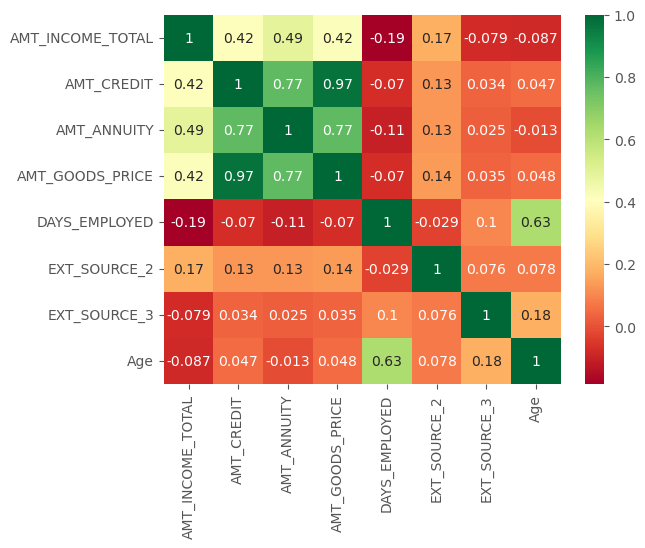

In [1265]:
sns.heatmap(df1[df1.TARGET == 0][num_columns].corr(), annot = True, cmap = 'RdYlGn');

In [1266]:
# the highest correlation is between the AMT_CREDIT &AMT_GOODS_PRICE

# the weakest correlation is between AMT_INCOME_TOTAL & DAYS_EMPLOYED

In [1267]:
plt.figure(figsize = [14, 3])

plt.subplot(1,2,1)
sns.scatterplot(data = df1[df1.TARGET == 1], x = df1[df1.TARGET == 1]['AMT_CREDIT'], y = df1[df1.TARGET == 1]['AMT_INCOME_TOTAL'],\
                hue= df1[df1.TARGET == 1]['CODE_GENDER']);
plt.title('TARGET 1')

plt.subplot(1,2,2)
sns.scatterplot(data = df1[df1.TARGET == 0], x = df1[df1.TARGET == 0]['AMT_CREDIT'], y = df1[df1.TARGET == 0]['AMT_INCOME_TOTAL'],\
                hue= df1[df1.TARGET == 0]['CODE_GENDER']);
plt.title('TARGET 0')



Text(0.5, 1.0, 'TARGET 0')

In [1268]:
# in the 1st scatterplot,
# the clients who are not able to repay is shown in the 1st scatter plot
# here it is not evenly distributed since the male data points are clusteres more towards the beginning which corresponds to the income between 15,000-30,000

# in the 2nd scatterplot, 
# the clients who are not able to repay is shown in the 1st scatter plot
# here it is better and is evenly distributed a bit as compared to the 1st scatterplot.
# looks like as the income grows the credit amount also grows

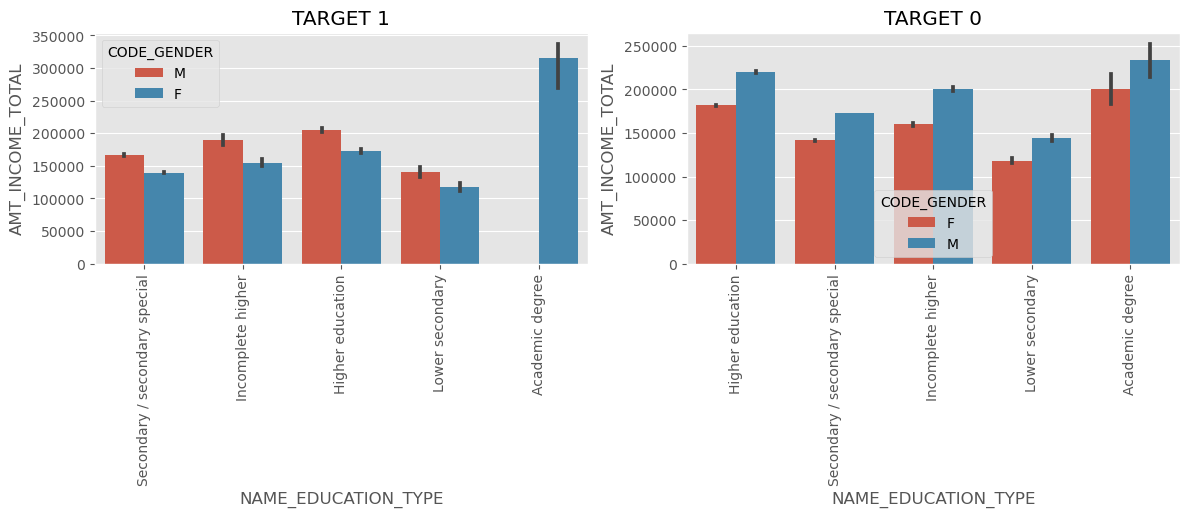

In [1269]:
plt.figure(figsize=[14,3])

plt.subplot(1,2,1)
sns.barplot(data = df1[df1.TARGET == 1], x = df1[df1.TARGET == 1]['NAME_EDUCATION_TYPE'], y = df1[df1.TARGET == 1]['AMT_INCOME_TOTAL'],\
                hue= df1[df1.TARGET == 1]['CODE_GENDER'])
plt.xticks(rotation = 90)
plt.title('TARGET 1')

plt.subplot(1,2,2)
sns.barplot(data = df1[df1.TARGET == 0], x = df1[df1.TARGET == 0]['NAME_EDUCATION_TYPE'], y = df1[df1.TARGET == 0]['AMT_INCOME_TOTAL'],\
                hue= df1[df1.TARGET == 0]['CODE_GENDER'])
plt.xticks(rotation = 90)
plt.title('TARGET 0');


In [1270]:
# In the first figure,
# for male clients who are not able to repay the loans, those who have secondary education level their income is more than 150000
# for female clients who are not able to repay the loans, those who have secondary education level their income is less than 150000

# for male clients who are not able to repay the loans, those who have incomplete higher education level their income is near  200,000
# for female clients who are not able to repay the loans, those who have incomplete higher education level their income is about 150000

# for male clients who are not able to repay the loans, those who have  higher education level their income is about  200,000
# for female clients who are not able to repay the loans, those who have  higher education level their income is less than 200,000

# for male clients who are not able to repay the loans, those who have lower secondary education level their income is less than 150,000
# for female clients who are not able to repay the loans, those who have lower secondary education level their income is more than 100,000

# for female clients who are not able to repay the loans, those who have academic degree education level their income is highest more than  300,000

# In the second figure, 
# for male clients who are  able to repay the loans, those who have higher education level their income is more than 150,000
# for female clients who are  able to repay the loans, those who have higher education level their income is more than 200,000

# for male clients who are  able to repay the loans, those who have secondary education level their income is near  150,000
# for female clients who are  able to repay the loans, those who have secondary education level their income is more than 150000

# for male clients who are  able to repay the loans, those who have  incomplete higher level their income is about 150,000
# for female clients who are  able to repay the loans, those who have  incomplete higher education level their income is about 200,000

# for male clients who are  able to repay the loans, those who have lower secondary education level their income is more than 100,000
# for female clients who are  able to repay the loans, those who have lower secondary education level their income is near 150,000

# for male clients who are  able to repay the loans, those who have academic degree education level their income is near 200,000
# for female clients who are  able to repay the loans, those who have academic degree education level their income is near 250,000


In [1271]:
pd.pivot_table(df1 , index = 'NAME_CONTRACT_TYPE', columns = 'CODE_GENDER' , values = 'TARGET')

CODE_GENDER                F         M
NAME_CONTRACT_TYPE                    
Cash loans          0.071811  0.105772
Revolving loans     0.052664  0.058503

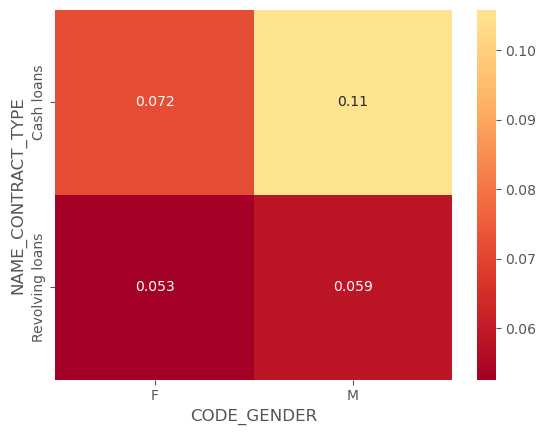

In [1272]:
sns.heatmap(pd.pivot_table(df1 , index = 'NAME_CONTRACT_TYPE', columns = 'CODE_GENDER' , values = 'TARGET'),\
            cmap = 'RdYlGn', annot = True, center = 0.117);


In [1273]:
pd.pivot_table(df1 , index = 'NAME_INCOME_TYPE', columns = 'CODE_GENDER' , values = 'TARGET')

CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Businessman           0.000000  0.000000
Commercial associate  0.066670  0.088287
Maternity leave       0.500000  0.000000
Pensioner             0.049534  0.073190
State servant         0.053353  0.068812
Student               0.000000  0.000000
Unemployed            0.352941  0.400000
Working               0.083713  0.114945

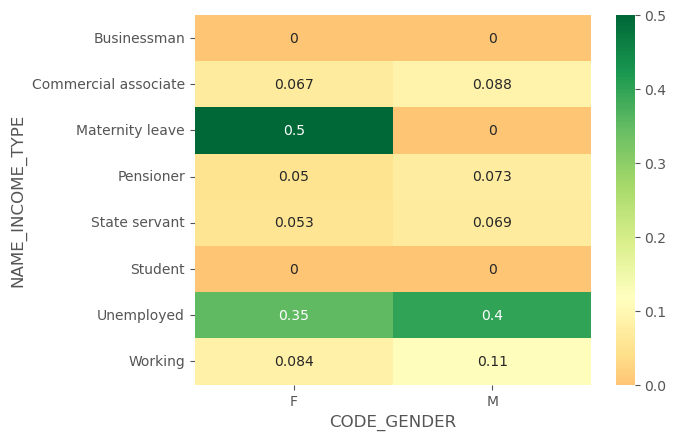

In [1274]:
sns.heatmap(pd.pivot_table(df1 , index = 'NAME_INCOME_TYPE', columns = 'CODE_GENDER' , values = 'TARGET'), cmap = 'RdYlGn', annot = True, center = 0.117);


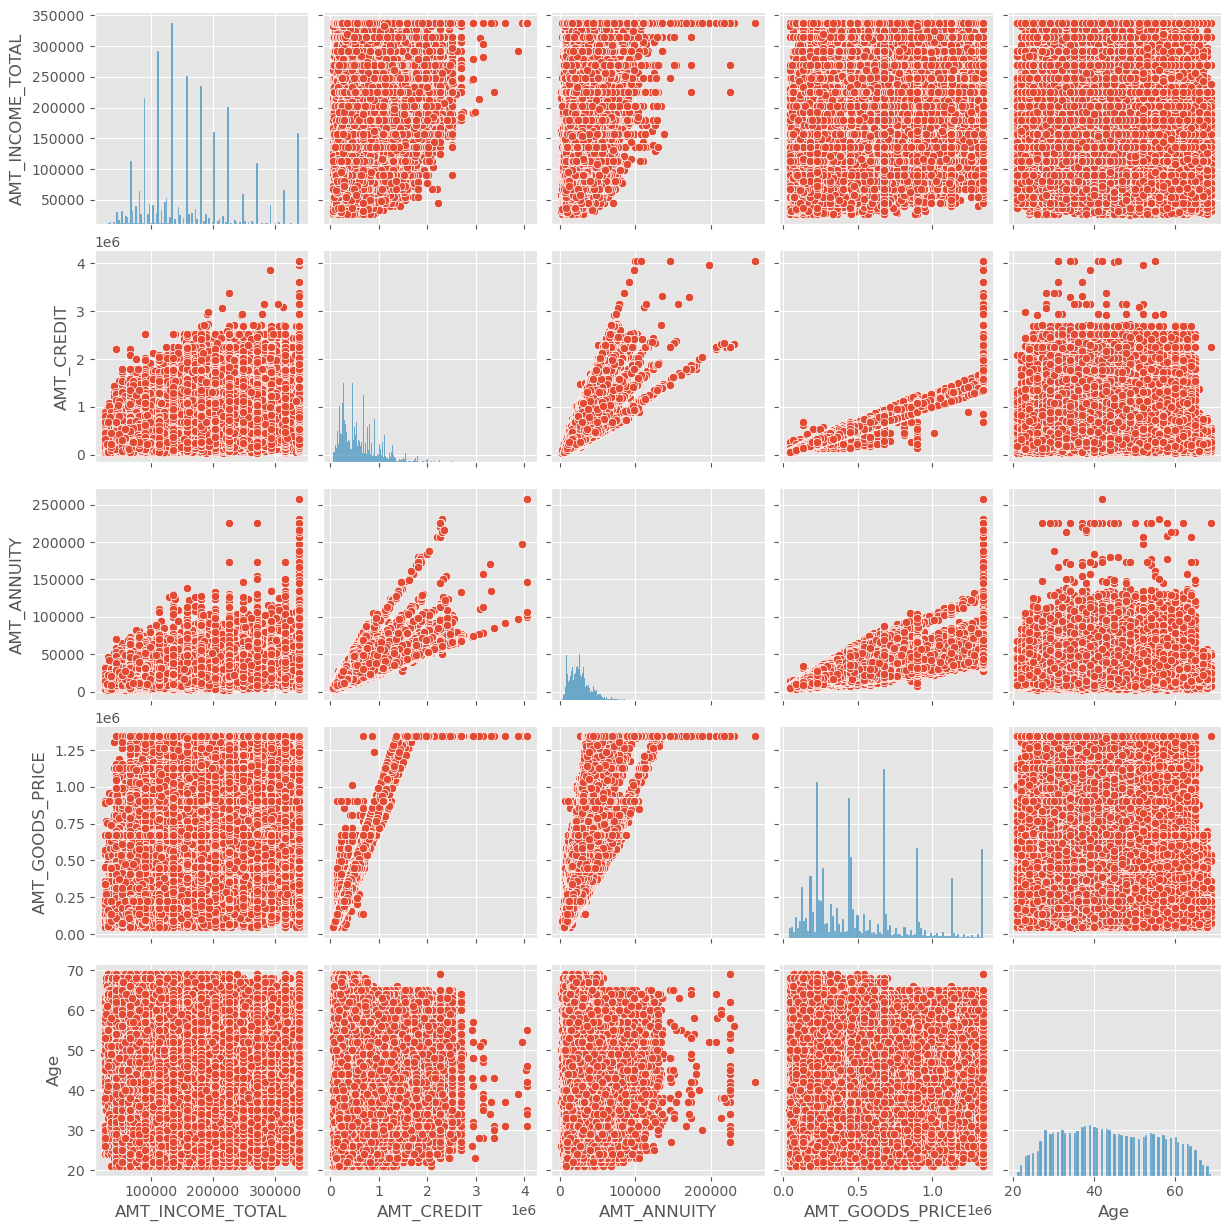

In [1275]:
sns.pairplot(df1[df1['TARGET'] == 0][['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','Age']] );

In [1276]:
# In this pairplot the AMT_CREDIT VS AMT ANNUITY shows as one grows another grows along with it.
# as AMT_GOODS_PRICE increases the AMT_ANNUITY & AMT_CREDIT also increases and at a certain point it doesnot grow

In [1277]:
sns.pairplot(df1[df1['TARGET'] == 1][['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','Age']] );

In [1278]:
# In this pairplot the AMT_CREDIT VS AMT ANNUITY shows as one grows another grows along with it.
# as AMT_GOODS_PRICE increases the AMT_ANNUITY & AMT_CREDIT also increases and at a certain point it doesnot grow

In [1279]:
df1

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
0           24700.5         351000.0               Working   
1           35698.5        1129500.0         State servant   
2            6750.0         135000.0               Working   
3           29686.5         297000.0               Working   
4           21865.5         513000.0               Working   
...             ...              ...                   ...   
307506      27558.0         225000.0               Working   
307507      12001.5         225000.0             Pensioner   
307508      29979.0         585000.0               Working   
307509      20205.0         319500.0  Commercial associate   
307510      49117.5         675000.0  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801        9461   
1       House / apartment                    0.003541       16765   
2       House / apartment                    0.010032       19046   
3       House / apartment                    0.008019       19005   
4       House / apartment                    0.028663       19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561        9327   
307507  House / apartment                    0.025164       20775   
307508  House / apartment                    0.005002       14966   
307509  House / apartment                    0.005313       11961   
307510  House / a

# Previous dataset

In [1280]:
df2 = pd.read_csv('previous_application.csv')

pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

In [1281]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [1282]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [1283]:
df2.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [1284]:
len(df2.columns[df2.isna().sum() > 0])

16

In [1285]:
# lets remove the columns which have null values greeater than 40%

df2.drop(df2.loc[:, ((((df2.isna().sum()/len(df2))*100))>=40)], axis = 1, inplace = True)


In [1286]:
df2.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [1287]:
# lets get rid of  columns which are not needed

df2 = df2.loc[:, ~(df2.columns.isin(['FLAG_LAST_APPL_PER_CONTRACT', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'WEEKDAY_APPR_PROCESS_START']))]

In [1288]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [1289]:
(df2.isna().sum()/len(df2))*100

SK_ID_PREV                 0.000000
SK_ID_CURR                 0.000000
NAME_CONTRACT_TYPE         0.000000
AMT_ANNUITY               22.286665
AMT_APPLICATION            0.000000
AMT_CREDIT                 0.000060
AMT_GOODS_PRICE           23.081773
NAME_CASH_LOAN_PURPOSE     0.000000
NAME_CONTRACT_STATUS       0.000000
DAYS_DECISION              0.000000
NAME_PAYMENT_TYPE          0.000000
CODE_REJECT_REASON         0.000000
NAME_CLIENT_TYPE           0.000000
NAME_GOODS_CATEGORY        0.000000
NAME_PORTFOLIO             0.000000
NAME_PRODUCT_TYPE          0.000000
CHANNEL_TYPE               0.000000
SELLERPLACE_AREA           0.000000
NAME_SELLER_INDUSTRY       0.000000
CNT_PAYMENT               22.286366
NAME_YIELD_GROUP           0.000000
PRODUCT_COMBINATION        0.020716
dtype: float64

In [1290]:
# lets get rid of  columns which are not needed

df2 = df2.loc[:, ~(df2.columns.isin(['NAME_PRODUCT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_SELLER_INDUSTRY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE']))]

In [1291]:
df2.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NAME_CONTRACT_TYPE           0
AMT_ANNUITY             372235
AMT_APPLICATION              0
AMT_CREDIT                   1
AMT_GOODS_PRICE         385515
NAME_CONTRACT_STATUS         0
DAYS_DECISION                0
CODE_REJECT_REASON           0
NAME_CLIENT_TYPE             0
NAME_PORTFOLIO               0
CHANNEL_TYPE                 0
SELLERPLACE_AREA             0
CNT_PAYMENT             372230
NAME_YIELD_GROUP             0
PRODUCT_COMBINATION        346
dtype: int64

In [1292]:
(df2.isna().sum()/len(df2))*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.000000
AMT_ANNUITY             22.286665
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000060
AMT_GOODS_PRICE         23.081773
NAME_CONTRACT_STATUS     0.000000
DAYS_DECISION            0.000000
CODE_REJECT_REASON       0.000000
NAME_CLIENT_TYPE         0.000000
NAME_PORTFOLIO           0.000000
CHANNEL_TYPE             0.000000
SELLERPLACE_AREA         0.000000
CNT_PAYMENT             22.286366
NAME_YIELD_GROUP         0.000000
PRODUCT_COMBINATION      0.020716
dtype: float64

In [1293]:
# lets replace the values with XNP and XNA with null values

df2.replace({'XNP':np.NaN, 'XNA':np.NaN}, inplace = True)

In [1294]:
(df2.isna().sum()/len(df2))*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.020716
AMT_ANNUITY             22.286665
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000060
AMT_GOODS_PRICE         23.081773
NAME_CONTRACT_STATUS     0.000000
DAYS_DECISION            0.000000
CODE_REJECT_REASON       0.313972
NAME_CLIENT_TYPE         0.116213
NAME_PORTFOLIO          22.286366
CHANNEL_TYPE             0.000000
SELLERPLACE_AREA         0.000000
CNT_PAYMENT             22.286366
NAME_YIELD_GROUP        30.966990
PRODUCT_COMBINATION      0.020716
dtype: float64

In [1295]:
len(df2[df2[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].isna().all(axis=1)])
# len(df2[df2[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].isna().all(axis=1)].index)

333855

In [1296]:
df2.shape

(1670214, 17)

In [1297]:
# lets remove rows which have null values in these columns 

df2 = df2.loc[~(df2.index.isin(df2[df2[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].isna().all(axis=1)].index)), :]

In [1298]:
(df2.isna().sum()/len(df2))*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.000000
AMT_ANNUITY              2.871983
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000075
AMT_GOODS_PRICE          3.865728
NAME_CONTRACT_STATUS     0.000000
DAYS_DECISION            0.000000
CODE_REJECT_REASON       0.389117
NAME_CLIENT_TYPE         0.070041
NAME_PORTFOLIO           2.871609
CHANNEL_TYPE             0.000000
SELLERPLACE_AREA         0.000000
CNT_PAYMENT              2.871609
NAME_YIELD_GROUP        13.720864
PRODUCT_COMBINATION      0.000000
dtype: float64

In [1299]:
df2.AMT_ANNUITY.describe().round()

count    1297979.0
mean       15955.0
std        14782.0
min            0.0
25%         6322.0
50%        11250.0
75%        20658.0
max       418058.0
Name: AMT_ANNUITY, dtype: float64

In [1300]:
sns.boxplot(data = df2, y = df2.AMT_ANNUITY);

In [ ]:
# there seems like there are outliers present

In [1301]:
# lets replace the null values in the AMT_ANNUITY column with mean of it

df1.AMT_ANNUITY.replace(np.NaN, df2.AMT_ANNUITY.mean(), inplace = True)

In [1302]:
int_quart_range = df2.AMT_ANNUITY.quantile([0.25, 0.75]).values[1] - df2.AMT_ANNUITY.quantile([0.25, 0.75]).values[0]

In [1303]:
ub = 1.5*int_quart_range + df2.AMT_ANNUITY.quantile([0.25, 0.75]).values[1]

In [1304]:
df2.AMT_ANNUITY =  np.where(df2.AMT_ANNUITY > ub, ub, df2.AMT_ANNUITY)
df2.AMT_ANNUITY.head(25)

0      1730.430
1     25188.615
2     15060.735
3     42163.380
4     31924.395
5     23703.930
10    11368.620
11    13832.775
12    12165.210
13     7654.860
14     9644.220
15    21307.455
16     4187.340
17     9000.000
18    10181.700
19     4666.500
20    25454.025
21    20361.600
23    39475.305
25    22619.520
26    16708.320
27    22242.825
28     7656.705
30     3286.485
31     9789.255
Name: AMT_ANNUITY, dtype: float64

In [1305]:
sns.boxplot(data = df2, y = df2.AMT_ANNUITY);

In [1306]:
df2.AMT_ANNUITY.describe().round()

count    1297979.0
mean       14981.0
std        11413.0
min            0.0
25%         6322.0
50%        11250.0
75%        20658.0
max        42163.0
Name: AMT_ANNUITY, dtype: float64

In [1307]:
# lets remove the rows whcih have the null values

df2 = df2.loc[~(df2.index.isin(df2[df2[['AMT_GOODS_PRICE', 'AMT_CREDIT']].isna().any(axis=1)].index)), :]

In [1308]:
df2.shape

(1284699, 17)

In [1309]:
# lets replace the null values in the CNT_PAYMENT column with mean of that column

df2.CNT_PAYMENT.replace(np.NaN, df2.CNT_PAYMENT.mean(), inplace = True)

In [1310]:
(df2.isna().sum()/len(df2))*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.000000
AMT_ANNUITY              2.987392
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000000
AMT_GOODS_PRICE          0.000000
NAME_CONTRACT_STATUS     0.000000
DAYS_DECISION            0.000000
CODE_REJECT_REASON       0.318830
NAME_CLIENT_TYPE         0.072858
NAME_PORTFOLIO           2.987081
CHANNEL_TYPE             0.000000
SELLERPLACE_AREA         0.000000
CNT_PAYMENT              0.000000
NAME_YIELD_GROUP        10.251429
PRODUCT_COMBINATION      0.000000
dtype: float64

In [1311]:
(df2.isna().sum()/len(df2))*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.000000
AMT_ANNUITY              2.987392
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000000
AMT_GOODS_PRICE          0.000000
NAME_CONTRACT_STATUS     0.000000
DAYS_DECISION            0.000000
CODE_REJECT_REASON       0.318830
NAME_CLIENT_TYPE         0.072858
NAME_PORTFOLIO           2.987081
CHANNEL_TYPE             0.000000
SELLERPLACE_AREA         0.000000
CNT_PAYMENT              0.000000
NAME_YIELD_GROUP        10.251429
PRODUCT_COMBINATION      0.000000
dtype: float64

In [1312]:
# Lets replace the values greater than the upper bound with the upper bound 

for i in ['AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'DAYS_DECISION']:
    int_quart_range = df2[i].quantile([0.25, 0.75]).values[1] - df2[i].quantile([0.25, 0.75]).values[0]
    ub = 1.5*int_quart_range + df2[i].quantile([0.25, 0.75]).values[1]
    df2[i] =  np.where(df2[i] > ub, ub, df2[i])

In [1351]:
# lets plot these columns in dfferent histplots 

j=1
plt.figure(figsize=(20,10))

for i in ['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO', 'CODE_REJECT_REASON','CHANNEL_TYPE']:
    plt.subplot(3,2,j)
    sns.histplot(data=df2,x=i, multiple='dodge', discrete=True);
    plt.subplots_adjust(wspace=0.4, hspace=0.8)
    
    if j == len(['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO', 'CODE_REJECT_REASON','CHANNEL_TYPE']):
        plt.subplot(3,2,j)     
        sns.histplot(data=df2, x=i, multiple='dodge', discrete=True);
        plt.subplots_adjust(wspace=0.4, hspace=0.8)
        plt.xticks(rotation = 90)

    j=j+1


In [ ]:
# consumer loans more than 800,000 is taken most times
# followed by cash loans more than 400,000
# and then revolving loans less than 200,000 is taken the least 

# the approved loans taken were the most 
# then followed by the refused loans

# the number of clients which had previously taken loans were the highest in number
# then follwed by the the clients who were new to take loans
# ans the ones whose previous loans were refused were less in number

# the rejections due to XAP are highest, followed by HC and LIMIT
# then rejections due to SCO and CLIENT are there also
# the rejections because of SCOFR, VERIF and SYSTEM is very minimal



In [1314]:
df2.dtypes

SK_ID_PREV                int64
SK_ID_CURR                int64
NAME_CONTRACT_TYPE       object
AMT_ANNUITY             float64
AMT_APPLICATION         float64
AMT_CREDIT              float64
AMT_GOODS_PRICE         float64
NAME_CONTRACT_STATUS     object
DAYS_DECISION           float64
CODE_REJECT_REASON       object
NAME_CLIENT_TYPE         object
NAME_PORTFOLIO           object
CHANNEL_TYPE             object
SELLERPLACE_AREA          int64
CNT_PAYMENT             float64
NAME_YIELD_GROUP         object
PRODUCT_COMBINATION      object
dtype: object

In [1315]:
df2.DAYS_DECISION.value_counts()

-364.0     1289
-329.0     1239
-238.0     1233
-352.0     1231
-245.0     1219
           ... 
-2886.0     128
-2922.0     127
-2921.0     123
-2902.0     122
-1.0          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [1316]:
# lets replace the negative values in the DAYS_DECISION column with their positive values since ddays cannot be in negative

df2.DAYS_DECISION = df2.DAYS_DECISION.abs()
df2.dtypes

SK_ID_PREV                int64
SK_ID_CURR                int64
NAME_CONTRACT_TYPE       object
AMT_ANNUITY             float64
AMT_APPLICATION         float64
AMT_CREDIT              float64
AMT_GOODS_PRICE         float64
NAME_CONTRACT_STATUS     object
DAYS_DECISION           float64
CODE_REJECT_REASON       object
NAME_CLIENT_TYPE         object
NAME_PORTFOLIO           object
CHANNEL_TYPE             object
SELLERPLACE_AREA          int64
CNT_PAYMENT             float64
NAME_YIELD_GROUP         object
PRODUCT_COMBINATION      object
dtype: object

In [1317]:
df2.DAYS_DECISION


0            73.0
1           164.0
2           301.0
3           512.0
4           781.0
            ...  
1670209     544.0
1670210    1694.0
1670211    1488.0
1670212    1185.0
1670213    1193.0
Name: DAYS_DECISION, Length: 1284699, dtype: float64

In [1318]:
# lets create a new columnw which represents the months by converting the days values to months

df2['mnth_Decision'] = np.floor(df2.DAYS_DECISION/30).astype(int)
df2

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    42163.380   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  \
0                17145.0    17145.00          17145.0             Approved   
1               508738.5   594672.75         508738.5             Approved   
2               112500.0   136444.50         112500.0             Approved   
3               450000.0   470790.00         450000.0             Approved   
4               337500.0   404055.00         337500.0              Refused   
...                  ...         ...              ...                  ...   
1670209         267295.5   311400.00         267295.5             Approved   
1670210          87750.0    64291.50          87750.0             Approved   
1670211         105237.0   102523.50         105237.0             Approved   
1670212         180000.0   191880.00         180000.0             Approved   
1670213         360000.0   360000.00         360000.0             Approved   

         DAYS_DECISION CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0                 73.0                XAP         Repeater            POS   
1                164.0                XAP         Repeater           Cash   
2                301.0                XAP         Repeater           Cash   
3                512.0                XAP         Repeater           Cash   
4                781.0                 HC         Repeater           Cash   
...                ...                ...              ...            ...   
1670209          544.0                XAP        Refreshed            POS   
1670210         1694.0                XAP              New            POS   
1670211         1488.0                XAP         Repeater            POS   
1670212         1185.0                XAP         Repeater           Cash   
1670213         1193.0                XAP         Repeater           Cash   

                    CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT  \
0                   Country-wide                35         12.0   
1                 Contact center                -1         36.0   
2        Credit and cash offices                -1         12.0   
3        Credit and cash offices                -1         12.0   
4        Credit and cash offices                -1         24.0   
...                          ...               ...          ...   
1670209                    Stone                43         30.0   
1670210                    Stone                43         12.0   
1670211             Country-wide              1370         10.0   
1670212          AP+ (Cash loan)                -1         12.0   
1670213          AP+ (Cash loan)                -1         48.0   

        NAME_YIELD_GROUP          PRODUCT_COMBINATION  mnth_Decision  
0                 middle     POS mobile with interest              2  
1             low_action             Cash X-Sell: low              5  
2                   high            Cash X-Sell: high             10  
3                 middle          Cash X-Sell: middle             17  
4                   high            Cash Street: high             26  
...                  ...                          ...            ...  
1670209       low_normal   POS industry 

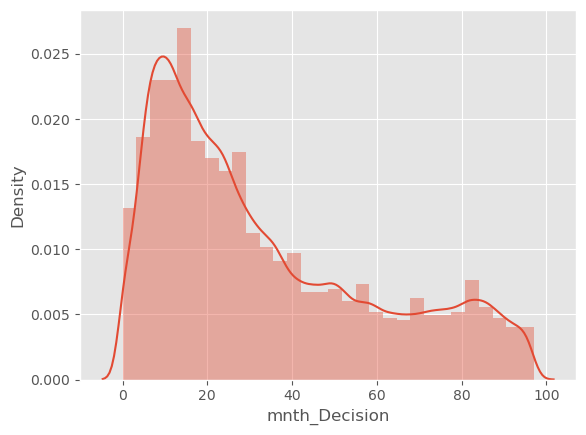

In [1319]:
sns.distplot(df2['mnth_Decision'], bins=30 );

In [1320]:
# here according to the plot, the likelihood of many decisions being taken was high in months 14 - 18.

# JOIN BOTH THE GIVEN DATASETS

In [1321]:
print(list(df2.columns))
print('\n',list(df1.columns))

['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'mnth_Decision']

 ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',

In [1322]:
df1[['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','Age','AMT_INCOME_TOTAL','EXT_SOURCE_2',\
 'EXT_SOURCE_3']]



SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0           100002       1           M  Secondary / secondary special   
1           100003       0           F               Higher education   
2           100004       0           M  Secondary / secondary special   
3           100006       0           F  Secondary / secondary special   
4           100007       0           M  Secondary / secondary special   
...            ...     ...         ...                            ...   
307506      456251       0           M  Secondary / secondary special   
307507      456252       0           F  Secondary / secondary special   
307508      456253       0           F               Higher education   
307509      456254       1           F  Secondary / secondary special   
307510      456255       0           F               Higher education   

          NAME_FAMILY_STATUS  Age  AMT_INCOME_TOTAL  EXT_SOURCE_2  \
0       Single / not married   26          202500.0      0.262949   
1                    Married   46          270000.0      0.622246   
2       Single / not married   52           67500.0      0.555912   
3             Civil marriage   52          135000.0      0.650442   
4       Single / not married   55          121500.0      0.322738   
...                      ...  ...               ...           ...   
307506             Separated   26          157500.0      0.681632   
307507                 Widow   57           72000.0      0.115992   
307508             Separated   41          153000.0      0.535722   
307509               Married   33          171000.0      0.514163   
307510               Married   46          157500.0      0.708569   

        EXT_SOURCE_3  
0           0.139376  
1           0.510853  
2           0.729567  
3           0.510853  
4           0.510853  
...              ...  
307506      0.510853  
307507      0.510853  
307508      0.218859  
307509      0.661024  
307510      0.113922  

[307233 rows x 9 columns]

In [1323]:
df2[["SK_ID_CURR",'AMT_CREDIT','AMT_APPLICATION','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT','NAME_CONTRACT_TYPE',\
 'NAME_CONTRACT_STATUS', 'mnth_Decision']]

SK_ID_CURR  AMT_CREDIT  AMT_APPLICATION  AMT_GOODS_PRICE  \
0            271877    17145.00          17145.0          17145.0   
1            108129   594672.75         508738.5         508738.5   
2            122040   136444.50         112500.0         112500.0   
3            176158   470790.00         450000.0         450000.0   
4            202054   404055.00         337500.0         337500.0   
...             ...         ...              ...              ...   
1670209      352015   311400.00         267295.5         267295.5   
1670210      334635    64291.50          87750.0          87750.0   
1670211      249544   102523.50         105237.0         105237.0   
1670212      400317   191880.00         180000.0         180000.0   
1670213      261212   360000.00         360000.0         360000.0   

         AMT_ANNUITY  CNT_PAYMENT NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS  \
0           1730.430         12.0     Consumer loans             Approved   
1          25188.615         36.0         Cash loans             Approved   
2          15060.735         12.0         Cash loans             Approved   
3          42163.380         12.0         Cash loans             Approved   
4          31924.395         24.0         Cash loans              Refused   
...              ...          ...                ...                  ...   
1670209    14704.290         30.0     Consumer loans             Approved   
1670210     6622.020         12.0     Consumer loans             Approved   
1670211    11520.855         10.0     Consumer loans             Approved   
1670212    18821.520         12.0         Cash loans             Approved   
1670213    16431.300         48.0         Cash loans             Approved   

         mnth_Decision  
0                    2  
1                    5  
2                   10  
3                   17  
4                   26  
...                ...  
1670209             18  
1670210             56  
1670211             49  
1670212             39  
1670213             39  

[1284699 rows x 9 columns]

In [1324]:
df3 = pd.merge(df1[['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','Age','AMT_INCOME_TOTAL','EXT_SOURCE_2',\
 'EXT_SOURCE_3']], df2[['SK_ID_CURR','AMT_CREDIT','AMT_APPLICATION','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT','NAME_CONTRACT_TYPE',\
 'NAME_CONTRACT_STATUS', 'mnth_Decision']], how = 'left' , on = 'SK_ID_CURR')

df3

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0            100002       1           M  Secondary / secondary special   
1            100003       0           F               Higher education   
2            100003       0           F               Higher education   
3            100003       0           F               Higher education   
4            100004       0           M  Secondary / secondary special   
...             ...     ...         ...                            ...   
1110631      456255       0           F               Higher education   
1110632      456255       0           F               Higher education   
1110633      456255       0           F               Higher education   
1110634      456255       0           F               Higher education   
1110635      456255       0           F               Higher education   

           NAME_FAMILY_STATUS  Age  AMT_INCOME_TOTAL  EXT_SOURCE_2  \
0        Single / not married   26          202500.0      0.262949   
1                     Married   46          270000.0      0.622246   
2                     Married   46          270000.0      0.622246   
3                     Married   46          270000.0      0.622246   
4        Single / not married   52           67500.0      0.555912   
...                       ...  ...               ...           ...   
1110631               Married   46          157500.0      0.708569   
1110632               Married   46          157500.0      0.708569   
1110633               Married   46          157500.0      0.708569   
1110634               Married   46          157500.0      0.708569   
1110635               Married   46          157500.0      0.708569   

         EXT_SOURCE_3  AMT_CREDIT  AMT_APPLICATION  AMT_GOODS_PRICE  \
0            0.139376   179055.00         179055.0         179055.0   
1            0.510853   594672.75         508738.5         508738.5   
2            0.510853   348637.50         337500.0         337500.0   
3            0.510853    68053.50          68809.5          68809.5   
4            0.729567    20106.00          24282.0          24282.0   
...               ...         ...              ...              ...   
1110631      0.113922   254340.00         229500.0         229500.0   
1110632      0.113922    45000.00          45000.0          45000.0   
1110633      0.113922   594672.75         508738.5         508738.5   
1110634      0.113922   594672.75         508738.5         508738.5   
1110635      0.113922    58545.00          58225.5          58225.5   

         AMT_ANNUITY  CNT_PAYMENT NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS  \
0           9251.775         24.0     Consumer loans             Approved   
1          42163.380         12.0         Cash loans             Approved   
2          42163.380          6.0     Consumer loans             Approved   
3           6737.310         12.0     Consumer loans             Approved   
4           5357.250          4.0     Consumer loans             Approved   
...              ...          ...                ...                  ...   
1110631    16400.610         24.0         Cash loans             Approved   
1110632     2250.000          0.0    Revolving loans              Refused   
1110633    30737.655         48.0         Cash loans              Refused   
1110634    42163.380         36.0         Cash loans             Approved   
1110635    11514.555          6.0     Consumer loans             Approved   

         mnth_Decision  
0                 20.0  
1                 24.0  
2                 27.0  
3                 78.0  
4                 27.0  
...                ...  
1110631           21.0  
1110632           15.0  
1110633            5.0  
1110634           26.0  
1110635           16.0  

[1110636 rows x 17 columns]

In [1325]:
df3['prcnt_CR'] = np.floor(df3['AMT_CREDIT']/df3['AMT_APPLICATION'])
df3

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0            100002       1           M  Secondary / secondary special   
1            100003       0           F               Higher education   
2            100003       0           F               Higher education   
3            100003       0           F               Higher education   
4            100004       0           M  Secondary / secondary special   
...             ...     ...         ...                            ...   
1110631      456255       0           F               Higher education   
1110632      456255       0           F               Higher education   
1110633      456255       0           F               Higher education   
1110634      456255       0           F               Higher education   
1110635      456255       0           F               Higher education   

           NAME_FAMILY_STATUS  Age  AMT_INCOME_TOTAL  EXT_SOURCE_2  \
0        Single / not married   26          202500.0      0.262949   
1                     Married   46          270000.0      0.622246   
2                     Married   46          270000.0      0.622246   
3                     Married   46          270000.0      0.622246   
4        Single / not married   52           67500.0      0.555912   
...                       ...  ...               ...           ...   
1110631               Married   46          157500.0      0.708569   
1110632               Married   46          157500.0      0.708569   
1110633               Married   46          157500.0      0.708569   
1110634               Married   46          157500.0      0.708569   
1110635               Married   46          157500.0      0.708569   

         EXT_SOURCE_3  AMT_CREDIT  AMT_APPLICATION  AMT_GOODS_PRICE  \
0            0.139376   179055.00         179055.0         179055.0   
1            0.510853   594672.75         508738.5         508738.5   
2            0.510853   348637.50         337500.0         337500.0   
3            0.510853    68053.50          68809.5          68809.5   
4            0.729567    20106.00          24282.0          24282.0   
...               ...         ...              ...              ...   
1110631      0.113922   254340.00         229500.0         229500.0   
1110632      0.113922    45000.00          45000.0          45000.0   
1110633      0.113922   594672.75         508738.5         508738.5   
1110634      0.113922   594672.75         508738.5         508738.5   
1110635      0.113922    58545.00          58225.5          58225.5   

         AMT_ANNUITY  CNT_PAYMENT NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS  \
0           9251.775         24.0     Consumer loans             Approved   
1          42163.380         12.0         Cash loans             Approved   
2          42163.380          6.0     Consumer loans             Approved   
3           6737.310         12.0     Consumer loans             Approved   
4           5357.250          4.0     Consumer loans             Approved   
...              ...          ...                ...                  ...   
1110631    16400.610         24.0         Cash loans             Approved   
1110632     2250.000          0.0    Revolving loans              Refused   
1110633    30737.655         48.0         Cash loans              Refused   
1110634    42163.380         36.0         Cash loans             Approved   
1110635    11514.555          6.0     Consumer loans             Approved   

         mnth_Decision  prcnt_CR  
0                 20.0       1.0  
1                 24.0       1.0  
2                 27.0       1.0  
3                 78.0       0.0  
4                 27.0       0.0  
...                ...       ...  
1110631           21.0       1.0  
1110632           15.0       1.0  
1110633            5.0       1.0  
1110634           26.0       1.0  
1110635           16.0       1.0  

[1110636 rows x 18 columns]

# UNIVARIATE ANALYSIS

In [1326]:
df3.NAME_CONTRACT_TYPE.unique()

array(['Consumer loans', 'Cash loans', 'Revolving loans', nan],
      dtype=object)

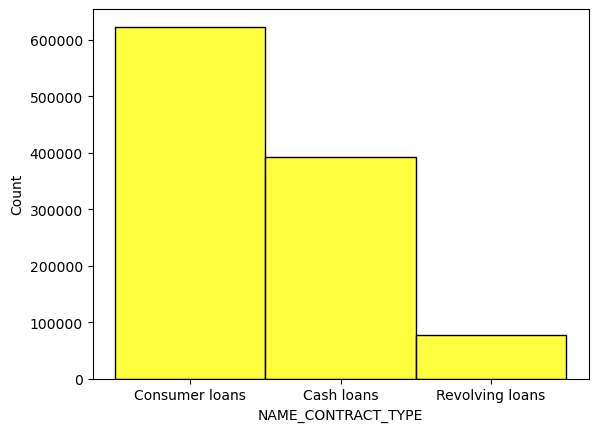

In [1327]:
# df3['NAME_CONTRACT_TYPE'].dtype

plt.style.use('default')

sns.histplot(data=df3['NAME_CONTRACT_TYPE'], multiple='dodge', discrete=True, color = 'yellow');

In [1328]:
# the clients who took consumer loans were the the highest in number which was more than 600,000
# the clients who took the cash loans were lesser in number which was near to 400,00 
# the number of clients who took the revolving loans were the least which was 100,000
# most clients applied for the cash loans

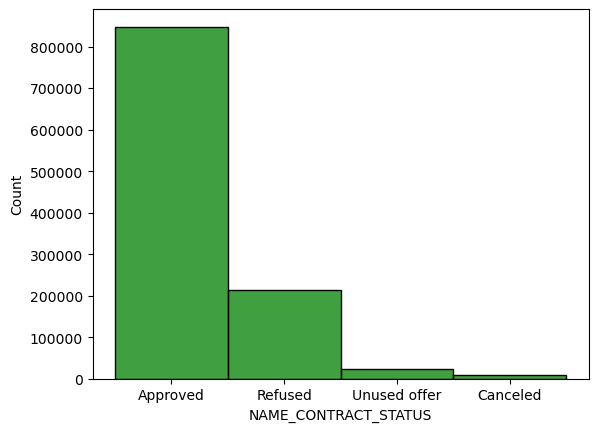

In [1329]:
sns.histplot(data=df3['NAME_CONTRACT_STATUS'], multiple='dodge', discrete=True, color = 'green');

In [1330]:
# loan application which got approved was most in number which was more than 800,000
# loan application which got rejected/refused was less which was 200,000
# loan application which got cancelled was less which was less than 10,000
# loan application which got unused offer was less which was near to 2,000

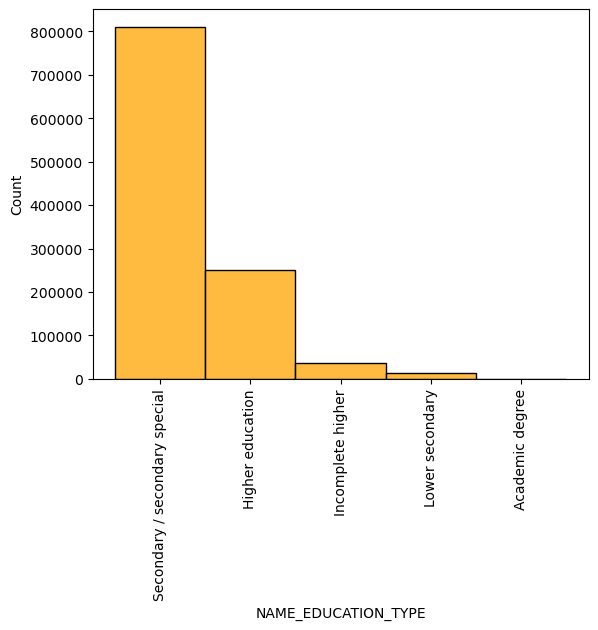

In [1331]:
sns.histplot(data=df3['NAME_EDUCATION_TYPE'], multiple='dodge', discrete=True, color = 'orange');
plt.xticks(rotation = 90);

In [1332]:
# clients whose education was secondary level was about 800,000
# clients whose education was higher education level was about 250,000
# clients whose education was incomplete higher level was about 2,000
# clients whose education was lower secodary level was about 1,000
# clients whose education was academic degree level was close to none


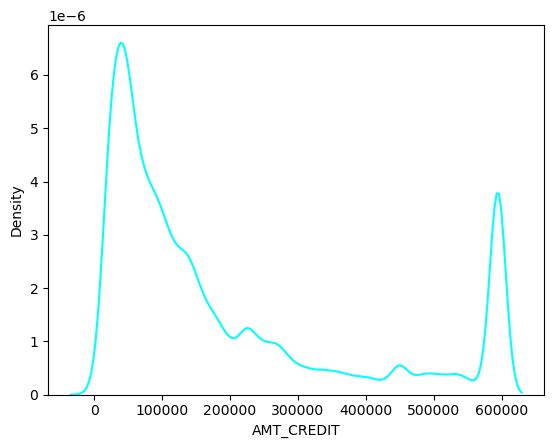

In [1333]:
sns.kdeplot(df3['AMT_CREDIT'], color = 'cyan');


In [1334]:
# high likelihood of loans 700,000 - 800,000 to be provided 
# high likelihoof of loans from 550,000 to 650,000 to be provided 

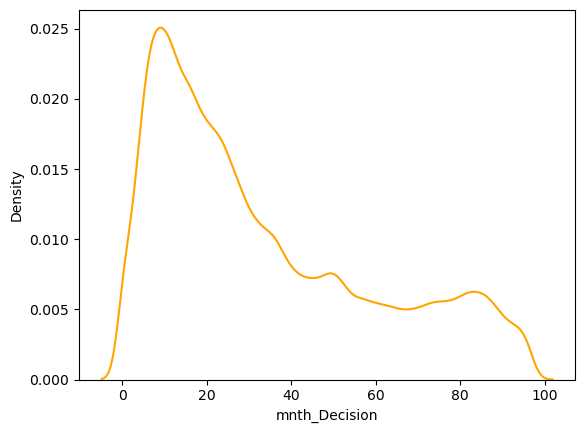

In [1335]:
sns.kdeplot(df3['mnth_Decision'], color = 'Orange');

In [1336]:
# In months between 15th-18th the probability of decisions taken was high.
# In the months till 65th the probability decreases and at around the 80th-90th months a probabilitty increases.

# BIVARIATE ANALYSIS

In [1337]:
# Analysing 'AMT_CREDIT', 'AMT_APPLICATION', 'AMT_ANNUITY', 'CNT_PAYMENT', 'prcnt_CR', 'mnth_Decision'

In [1338]:
df3[['AMT_CREDIT', 'AMT_APPLICATION', 'AMT_ANNUITY', 'CNT_PAYMENT', 'prcnt_CR', 'mnth_Decision']].corr()

AMT_CREDIT  AMT_APPLICATION  AMT_ANNUITY  CNT_PAYMENT  \
AMT_CREDIT         1.000000         0.990011     0.867353     0.714324   
AMT_APPLICATION    0.990011         1.000000     0.872095     0.686191   
AMT_ANNUITY        0.867353         0.872095     1.000000     0.471632   
CNT_PAYMENT        0.714324         0.686191     0.471632     1.000000   
prcnt_CR           0.402734         0.365647     0.326545     0.331645   
mnth_Decision     -0.369763        -0.364490    -0.308530    -0.231600   

                 prcnt_CR  mnth_Decision  
AMT_CREDIT       0.402734      -0.369763  
AMT_APPLICATION  0.365647      -0.364490  
AMT_ANNUITY      0.326545      -0.308530  
CNT_PAYMENT      0.331645      -0.231600  
prcnt_CR         1.000000      -0.459181  
mnth_Decision   -0.459181       1.000000

In [1339]:
sns.heatmap(df3[['AMT_CREDIT', 'AMT_APPLICATION', 'AMT_ANNUITY', 'CNT_PAYMENT', 'prcnt_CR', 'mnth_Decision']].corr(),\
            cmap = 'RdYlGn', annot = True);

In [1340]:

# the highest strongest positive correlation is between the following variables:
# 1. AMT_ANNUITY & AMT_CREDIT, 
# 2. AMT_APPLICATION & AMT_CREDIT
# 3. AMT_ANNUITY & AMT_CREDIT
# 4. AMT_ANNUITY & AMT_APPLICATION

# the lowest negative weakest correlation is between the following variables:
# 1. AMT_CREDIT & mnth_Decision
# 2. AMT_APPLICATION & mnth_Decision
# 3. prcnt_CR & mnth_Decision
# 4. mnth_Decision & AMT_APPLICATION
# 5. mnth_Decision & AMT_CREDIT

In [1341]:
# Analysing 'NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS'

In [1342]:
df4 = df3[['AMT_CREDIT', 'AMT_APPLICATION', 'AMT_ANNUITY', 'CNT_PAYMENT', 'prcnt_CR', 'mnth_Decision']]
df4

AMT_CREDIT  AMT_APPLICATION  AMT_ANNUITY  CNT_PAYMENT  prcnt_CR  \
0         179055.00         179055.0     9251.775         24.0       1.0   
1         594672.75         508738.5    42163.380         12.0       1.0   
2         348637.50         337500.0    42163.380          6.0       1.0   
3          68053.50          68809.5     6737.310         12.0       0.0   
4          20106.00          24282.0     5357.250          4.0       0.0   
...             ...              ...          ...          ...       ...   
1110631   254340.00         229500.0    16400.610         24.0       1.0   
1110632    45000.00          45000.0     2250.000          0.0       1.0   
1110633   594672.75         508738.5    30737.655         48.0       1.0   
1110634   594672.75         508738.5    42163.380         36.0       1.0   
1110635    58545.00          58225.5    11514.555          6.0       1.0   

         mnth_Decision  
0                 20.0  
1                 24.0  
2                 27.0  
3                 78.0  
4                 27.0  
...                ...  
1110631           21.0  
1110632           15.0  
1110633            5.0  
1110634           26.0  
1110635           16.0  

[1110636 rows x 6 columns]

In [1343]:
j=1
plt.figure(figsize=(21,11))

for i in ['NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']:
    plt.subplot(2,2,j)
    sns.histplot(data=df3, x=i, hue = 'CODE_GENDER', multiple='dodge', discrete=True);
    plt.subplots_adjust(wspace=0.4, hspace=1)
    plt.xticks(rotation = 90)
    j=j+1

In [1344]:
# the consumer loans were taken more than other kinds of loans
# the applications for consumer loans by female clients were much high than cash loans/revolving loans by female clients
# the applications for consumer loans by male clients were higher than cash loans/revolving loans by male clients

# clients who were educated till secondary level were the most applying for loans.
# the applications of secondary educated female clients were very high as compared to higher education female clients
# the applications of secondary educated male clients were high as compared to higher education male clients

# most applications were of female married clients
# married female applications were very high as compared to single female applications
# married male applications were higher as compared to male single male applications


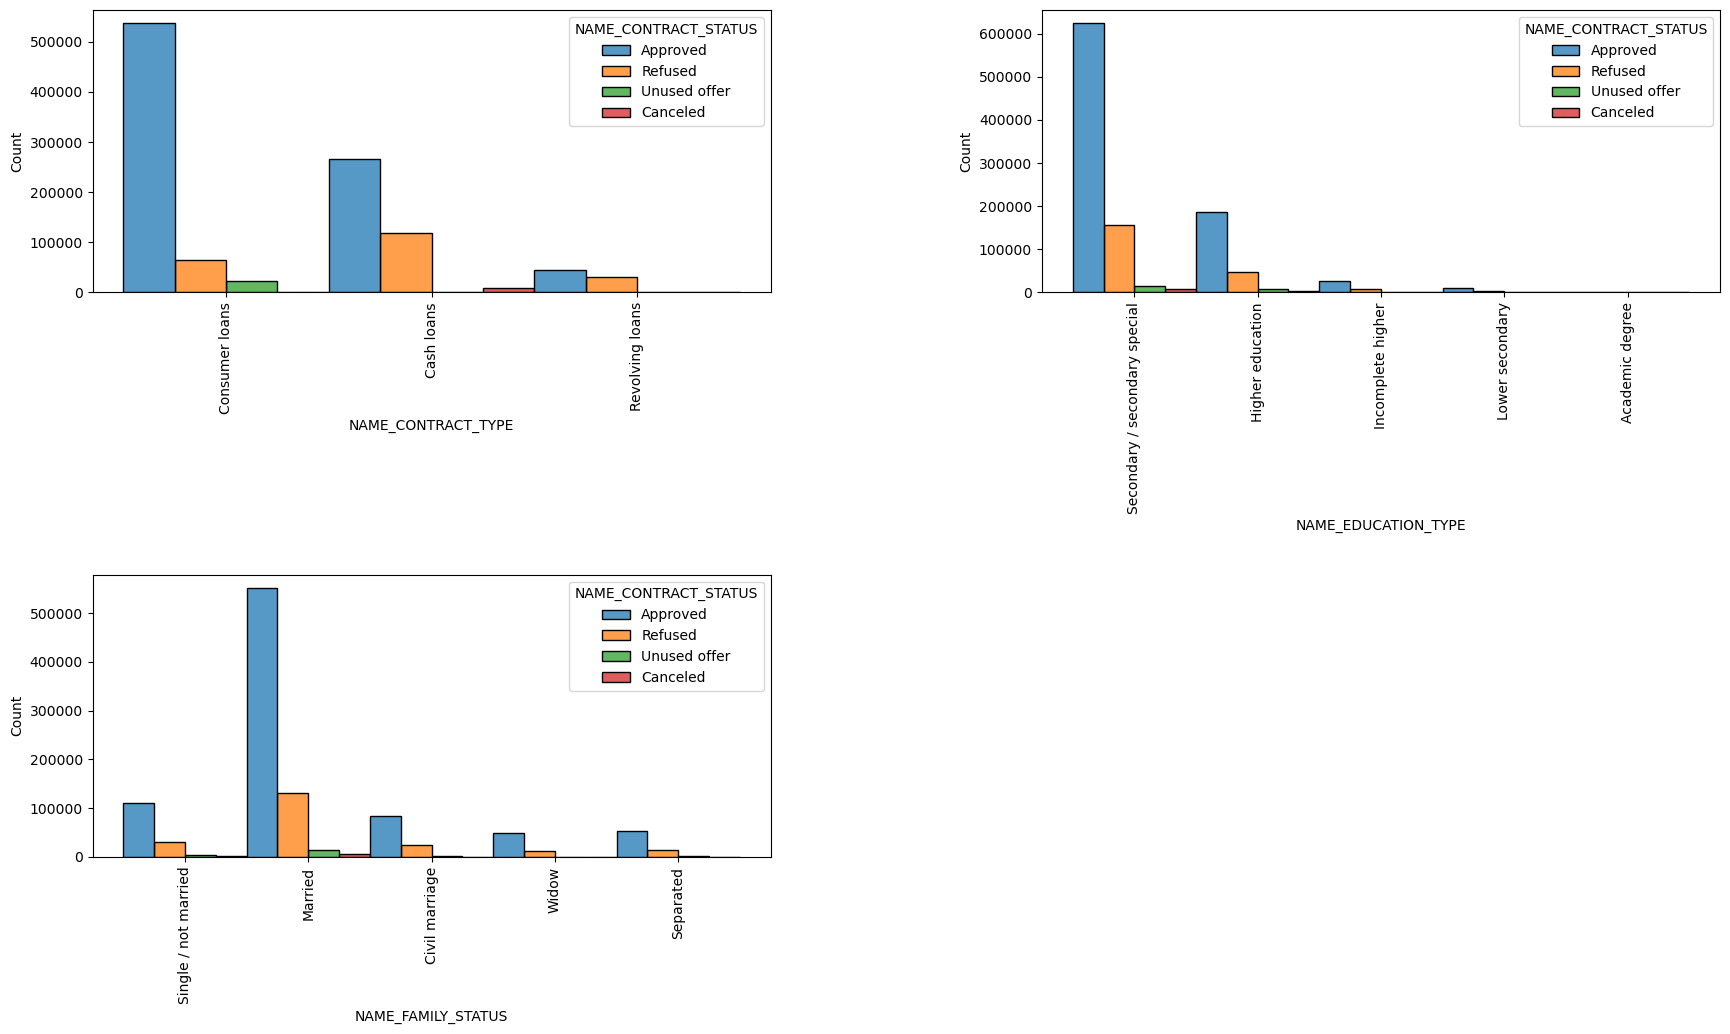

In [1345]:
j=1
plt.figure(figsize=(21,11))

for i in ['NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']:
    plt.subplot(2,2,j)
    sns.histplot(data=df3, x=i, hue = 'NAME_CONTRACT_STATUS', multiple='dodge', discrete=True);
    plt.subplots_adjust(wspace=0.4, hspace=1)
    plt.xticks(rotation = 90)
    j=j+1

In [1346]:
# the number of approved consumer loans applications were very high as  compared to to the refused consumer loans applications and unused offer consumer loans.
# the number of approved cash loans applications were significantly high as compared to refused cash loans applications
# the number of approved revolving loans applications were high by a small margin as compared to refused revolving loans applications.

# the number of approved applications having education level as secondary were very high.
# the number of approved applications having education level as higher education were high.
# the number of approved applications having education level as incomplete higher were small.

# the number of applications of the married clients whose applications got approved were very high as compared to single who had their applications approved 
# the number of applications of the married clients whose applications got refused were higher as compared to single clients who had their applications approved 


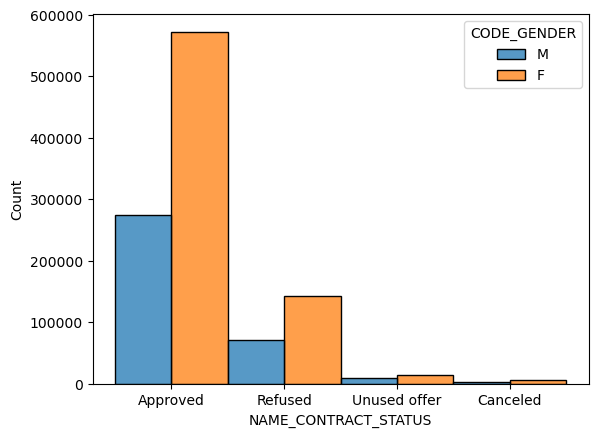

In [1347]:
sns.histplot(x = "NAME_CONTRACT_STATUS", hue = "CODE_GENDER", multiple = 'dodge', data = df3 );

In [1348]:
# The applications of female applicants got approved a lot more than the male applications
# More applications of female applicants got refused than applications of male applicants.
# More applications of female applicants were unused than applications of male applicants just by a little bit.
# very few female and male client's application got cancelled.